In [222]:
import numpy as np
from PIL import ImageGrab, Image
%matplotlib inline
import matplotlib.pyplot as plt
import rasterio
import matplotlib.image as mpimg
from rasterio.plot import show


In [223]:
# importing libraries

import pyautogui
import time

# initializing variables for image processing

screenshot = pyautogui.screenshot()

# specifiying the path to save the image
# matthew macbook m2 air dimensions 2560 x 1664

In [224]:
# Conversion of images to video

import cv2
import os

folder_size = 123


def images_to_video(image_folder, video_name, fps):
    #images = [img for img in os.listdir(image_folder) if img.endswith(".tiff")]
    start = 17
    end = folder_size+17
    images = []
    for i in range(start, end):
        if i > 100:
            name="/Users/christianjohnson/Downloads/Glare/testPylonImages/Basler_acA1300-200um__24681880__20240430_200842309_0"
        else:
            name="/Users/christianjohnson/Downloads/Glare/testPylonImages/Basler_acA1300-200um__24681880__20240430_200842309_00"
        name+=str(i)
        name+=".tiff"
        #print(name)
        images.append(name)
        
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape
    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    cv2.destroyAllWindows()
    video.release()

# Provide the path to the folder containing images, desired output video name, and frame rate
image_folder = '/Users/christianjohnson/Downloads/Glare/testPylonImages'
video_name = 'demoGLARE.mp4'
fps = 1  # Adjust the frame rate as per your requirement

images_to_video(image_folder, video_name, fps)

[ WARN:0@48532.165] global loadsave.cpp:248 findDecoder imread_('/Users/christianjohnson/Downloads/Glare/testPylonImages/Basler_acA1300-200um__24681880__20240430_200842309_00100.tiff'): can't open/read file: check file path/integrity


In [256]:
"""
    universal_blocking takes an array of of any shape and a jump value. 
    It then finds the maximum average value of a block of size jump x jump
"""
def universal_blocking(array, jump):
    # Deriving the array demensions then trimming for ease of indexing
    r, c = array.shape
    r -= r%jump
    c -= c%jump
    array = array/255.
    #print(array.shape)
    ar1 = np.arange(0,r-1, jump)
    ar2 = np.arange(0,c-1, jump)
    max_value = 0.
    coord = ()




    for i in ar1:
        for j in ar2:
            b_sum = 0
            for i2 in range(jump):
                for j2 in range(jump):
                    #print(i+i2, j+j2)
                    b_sum += array[i+i2][j+j2]
            current_average = b_sum/(jump^2)
            if(current_average > max_value):
                #print(current_average, (i, j))
                max_value = current_average
                coord=(i,j)
    return coord



In [226]:
def overlay(tiff_path, jump):   
    #im = Image.open(tiff_path,  cv2.IMREAD_UNCHANGED)
    im = cv2.imread(tiff_path, cv2.IMREAD_UNCHANGED)

    imarray = np.array(im)

    coord = universal_blocking(imarray,jump)
    #print(coord)
    for i in range(jump):
        for j in range(jump):
            imarray[(coord[0]+i),(coord[1]+j)] = 0
    #print(coord)
    imarray*=255
    pil_image = Image.fromarray(imarray)
    #imgplot = plt.imshow(im)
    display_image = cv2.imread(pil_image, cv2.IMREAD_UNCHANGED)

    plt.imshow(display_image,cmap='gray')

    im = Image.fromarray(imarray)


    # #inverting the image
    # fullArray = np.full(imarray, [255, 255, 255, 0])
    # invertedImageArray = abs(fullArray - imarray) 
    # invertedImageArray = invertedImageArray.astype(np.uint8)

    # #displaying the inverted image
    # invertedImage = Image.fromarray(invertedImageArray)
    # invertedImage.show()




    # plt.imshow(im, cmap='gray')
    # plt.imshow(im)
    #imgplot = cv2.bitwise_not(imgplot)

    return imgplot
    
    

        
start = 17
end = folder_size+17
images = []
for i in range(start, end):
    if i >= 100:
        name="/Users/christianjohnson/Downloads/Glare/testPylonImages/Basler_acA1300-200um__24681880__20240430_200842309_0"
    else:
        name="/Users/christianjohnson/Downloads/Glare/testPylonImages/Basler_acA1300-200um__24681880__20240430_200842309_00"
    name+=str(i)
    name+=".tiff"
    images.append(name)

#for tiff_path in images:
#    image_save = overlay(tiff_path, 100)
#     fname = f"{tiff_path[:-5]}_overlay.png"
#     cv2.imwrite(fname, image_save)


im_save = overlay(images[70], 100)
# fname = f"{images[70][:-5]}_overlay.png"
# print(fname)
# cv2.imwrite( , im_save)

pil_image = cv2.imread(images[70], cv2.IMREAD_UNCHANGED)

plt.imshow(pil_image,cmap='gray')
print(pil_image.shape)
#print(f'dtype: {pil_image.dtype}, shape: {pil_image.shape}, min: {np.min(pil_image)}, max: {np.max(pil_image)}')



TypeError: Can't convert object to 'str' for 'filename'

['/Users/christianjohnson/Downloads/Glare/GLARE/images/NOutput1.png', '/Users/christianjohnson/Downloads/Glare/GLARE/images/NOutput2.png', '/Users/christianjohnson/Downloads/Glare/GLARE/images/NOutput3.png', '/Users/christianjohnson/Downloads/Glare/GLARE/images/NOutput4.png', '/Users/christianjohnson/Downloads/Glare/GLARE/images/NOutput5.png', '/Users/christianjohnson/Downloads/Glare/GLARE/images/NOutput6.png', '/Users/christianjohnson/Downloads/Glare/GLARE/images/NOutput7.png', '/Users/christianjohnson/Downloads/Glare/GLARE/images/NOutput8.png', '/Users/christianjohnson/Downloads/Glare/GLARE/images/NOutput9.png', '/Users/christianjohnson/Downloads/Glare/GLARE/images/NOutput10.png', '/Users/christianjohnson/Downloads/Glare/GLARE/images/NOutput11.png', '/Users/christianjohnson/Downloads/Glare/GLARE/images/NOutput12.png', '/Users/christianjohnson/Downloads/Glare/GLARE/images/NOutput13.png', '/Users/christianjohnson/Downloads/Glare/GLARE/images/NOutput14.png', '/Users/christianjohnson/Dow

libpng warning: pHYs: CRC error


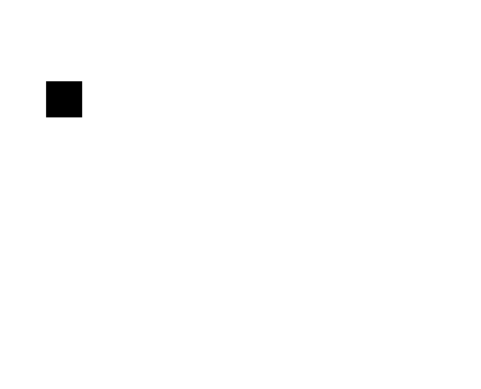

here
100 200


libpng warning: pHYs: CRC error


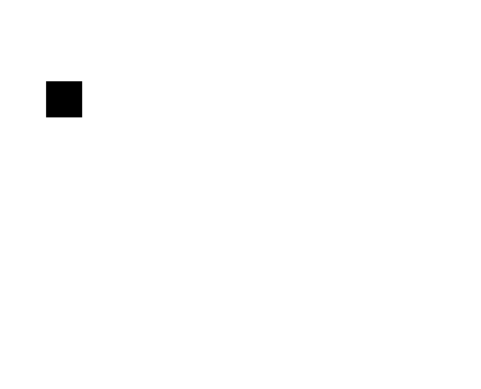

here
100 200


libpng warning: pHYs: CRC error


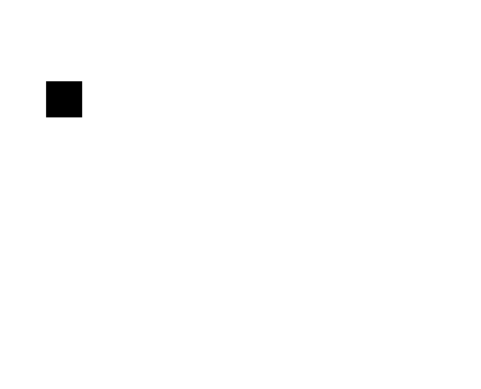

here
100 200


libpng warning: pHYs: CRC error


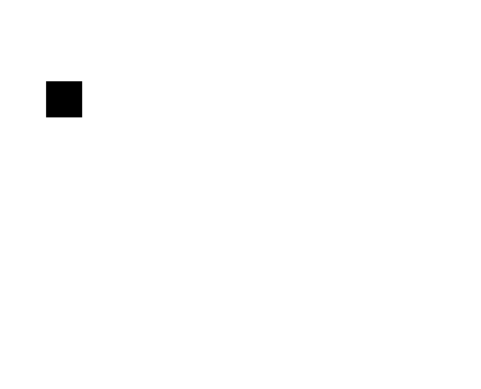

here
100 200


libpng warning: pHYs: CRC error


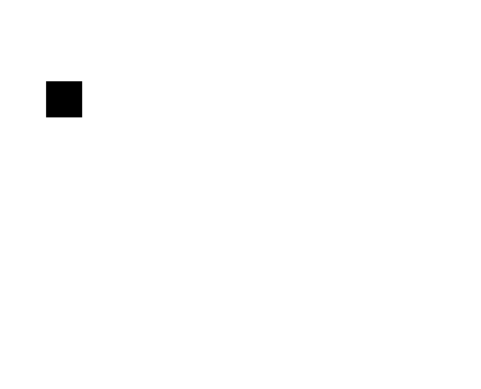

here
100 200


libpng warning: pHYs: CRC error


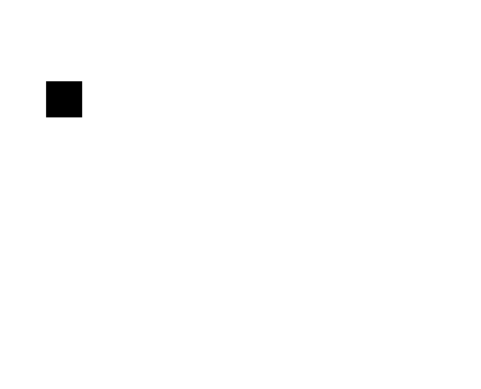

here
100 200


libpng warning: pHYs: CRC error


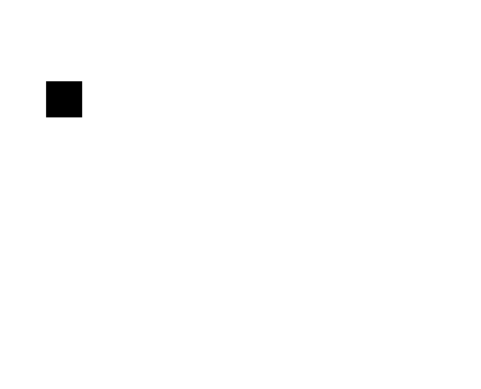

here
100 200


libpng warning: pHYs: CRC error


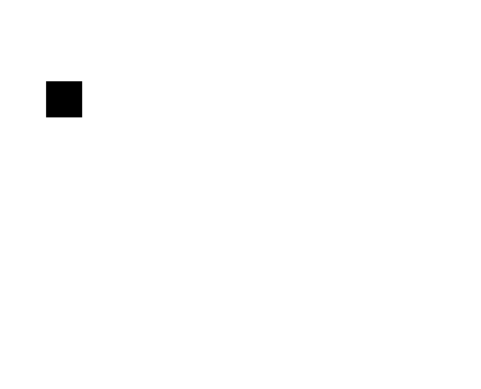

here
100 200


libpng warning: pHYs: CRC error


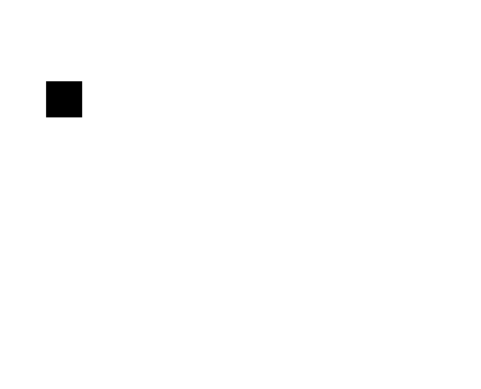

here


libpng warning: pHYs: CRC error


100 200


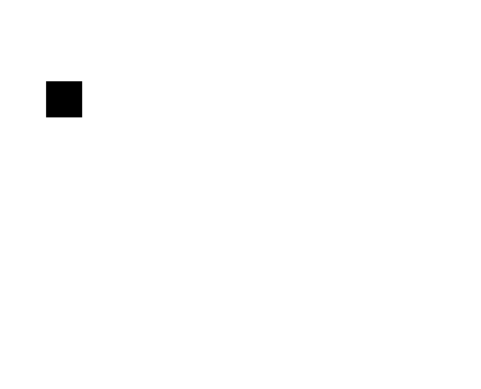

here
100 200


libpng warning: pHYs: CRC error


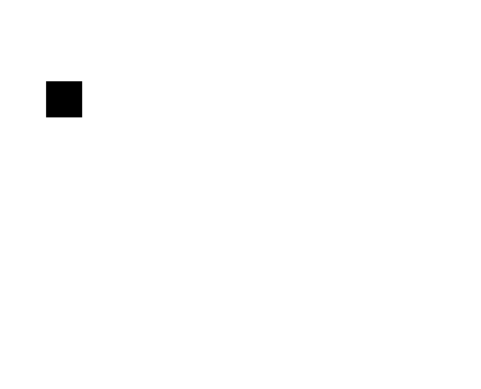

here


libpng warning: pHYs: CRC error


100 200


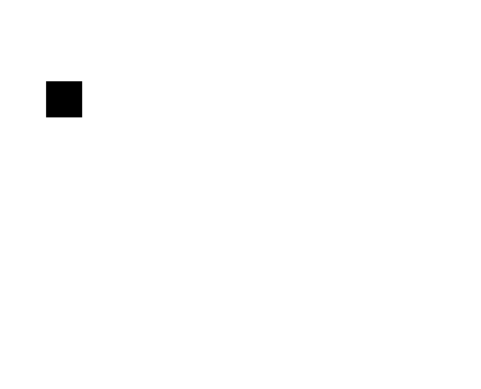

here
100 200


libpng warning: pHYs: CRC error


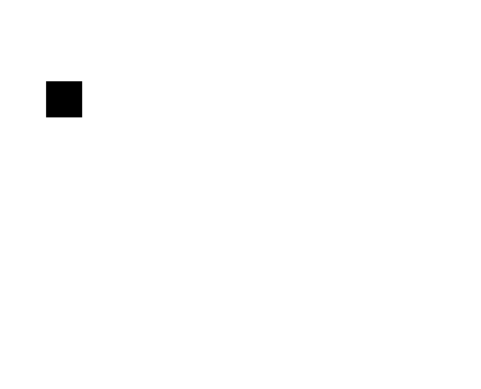

here
100 200


libpng warning: pHYs: CRC error


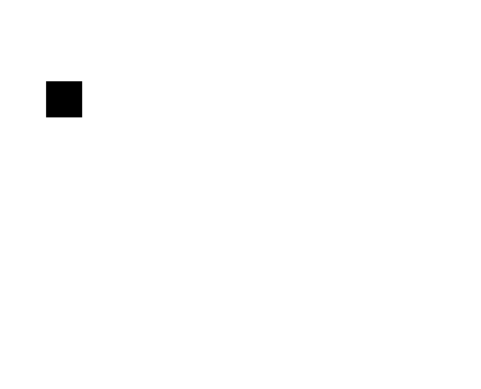

here
100 200


libpng warning: pHYs: CRC error


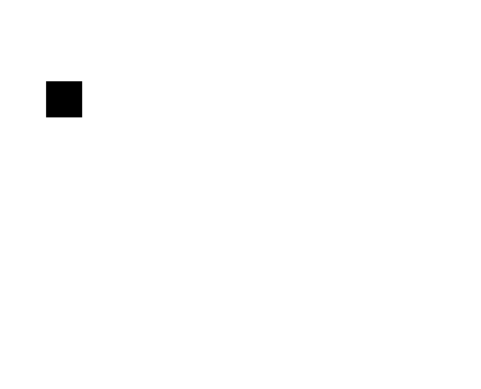

here
100 200


libpng warning: pHYs: CRC error


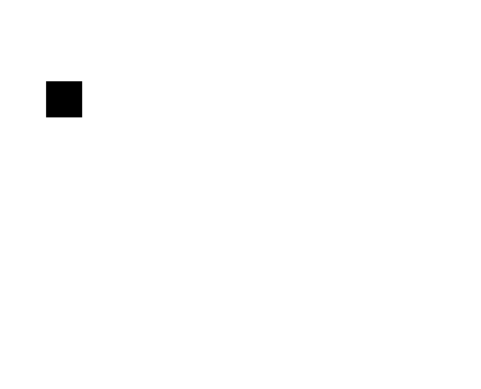

here
100 200


libpng warning: pHYs: CRC error


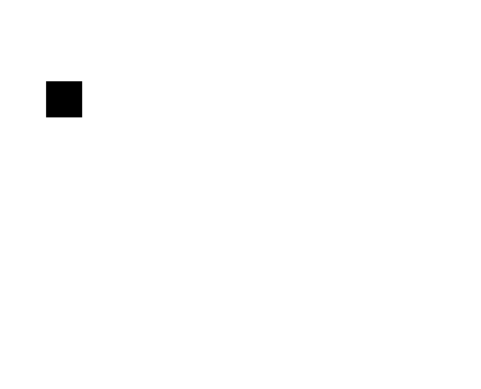

here
100 200


libpng warning: pHYs: CRC error


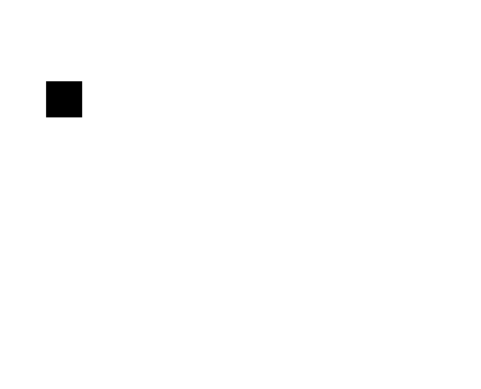

here


libpng warning: pHYs: CRC error


100 200


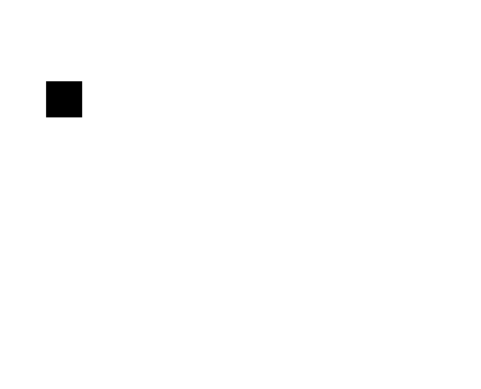

here
100 200


libpng warning: pHYs: CRC error


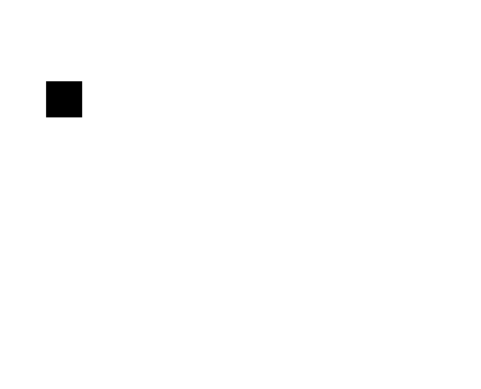

here
100 200


libpng warning: pHYs: CRC error


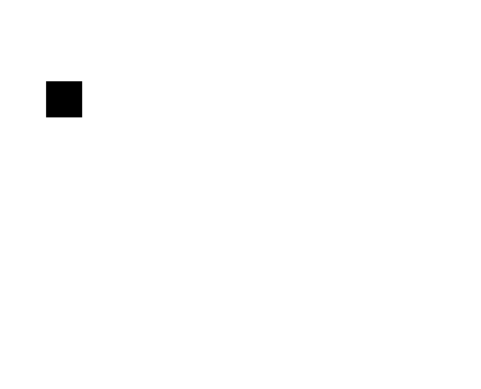

here
100 200


libpng warning: pHYs: CRC error


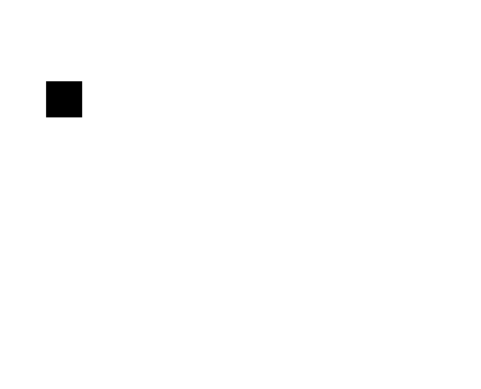

here
100 200


libpng warning: pHYs: CRC error


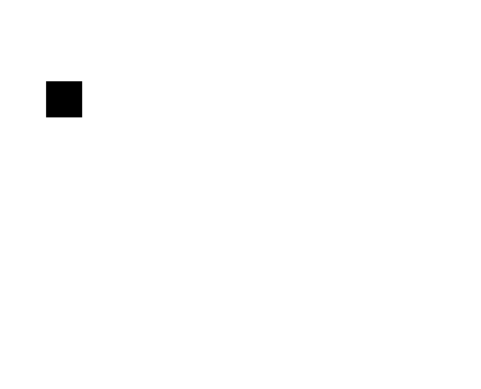

here
100 200


libpng warning: pHYs: CRC error


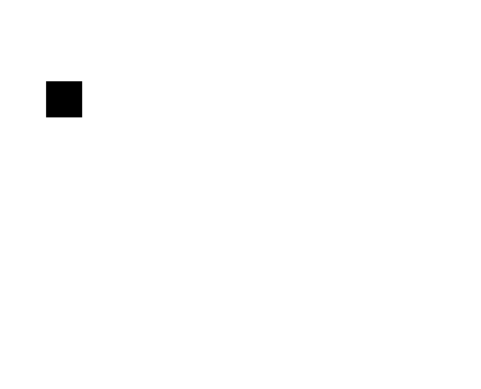

here
100 200


libpng warning: pHYs: CRC error


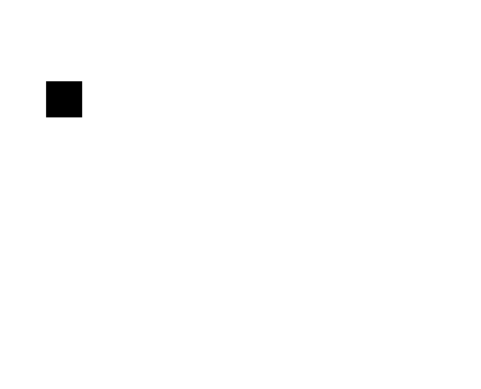

here
100 200


libpng warning: pHYs: CRC error


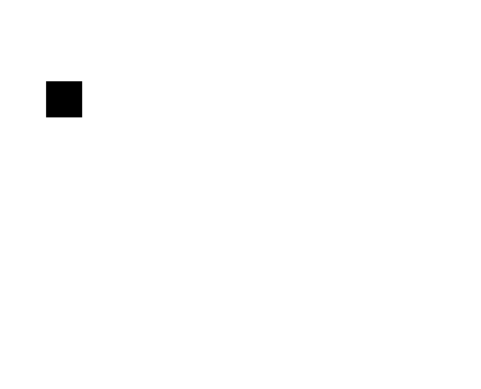

here
100 200


libpng warning: pHYs: CRC error


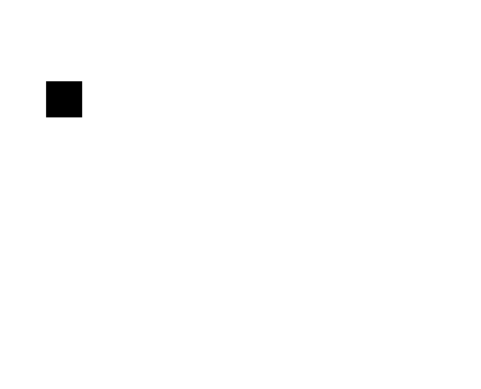

here
100 200


libpng warning: pHYs: CRC error


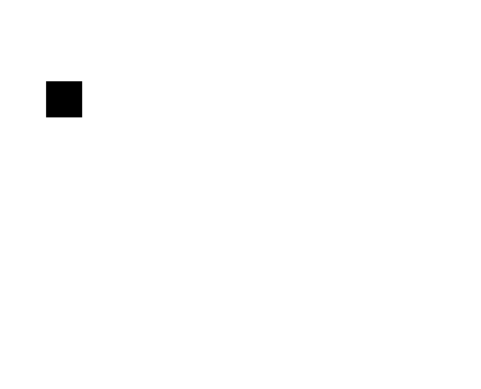

here
100 200


libpng warning: pHYs: CRC error


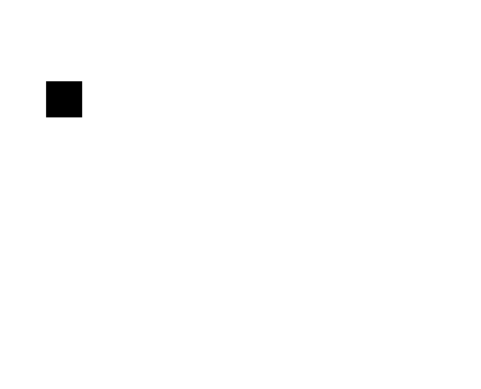

here
100 200


libpng warning: pHYs: CRC error


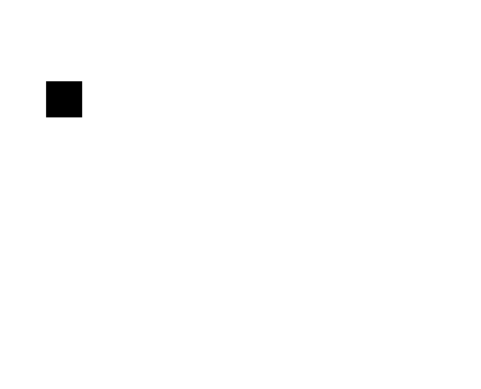

here
100 200


libpng warning: pHYs: CRC error


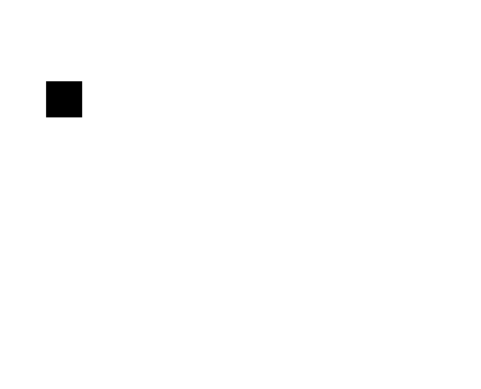

here
100 200


libpng warning: pHYs: CRC error


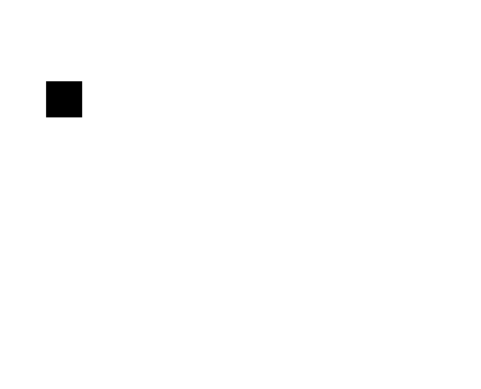

here


libpng warning: pHYs: CRC error


100 200


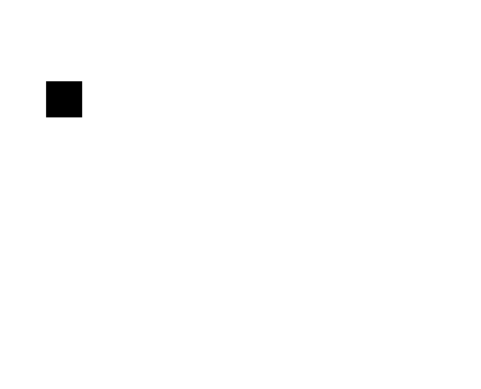

here
100 200


libpng warning: pHYs: CRC error


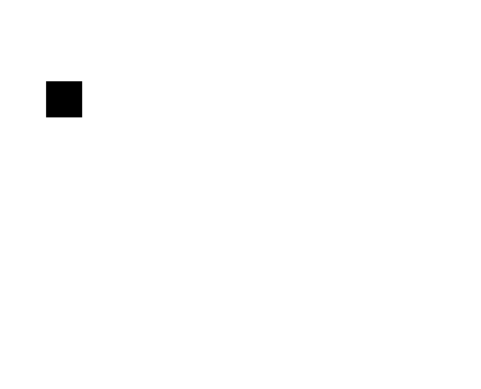

here
100 200


libpng warning: pHYs: CRC error


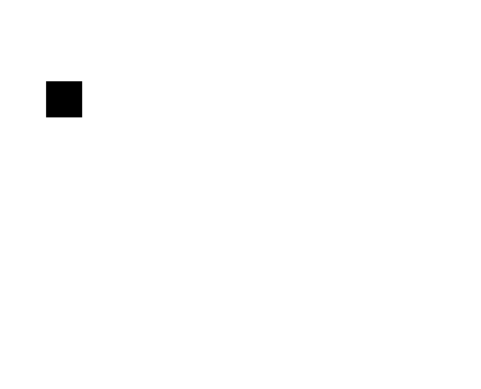

here
100 200


libpng warning: pHYs: CRC error


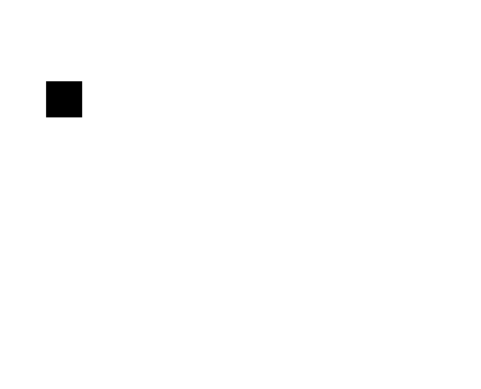

here
100 200


libpng warning: pHYs: CRC error


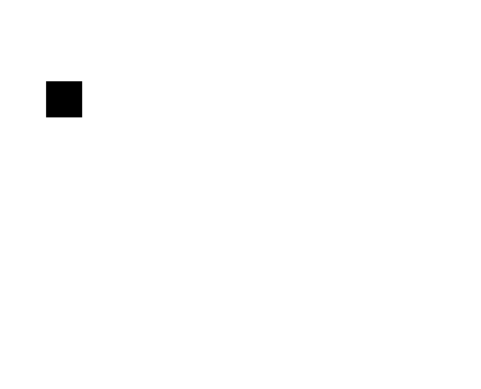

here
100 200


libpng warning: pHYs: CRC error


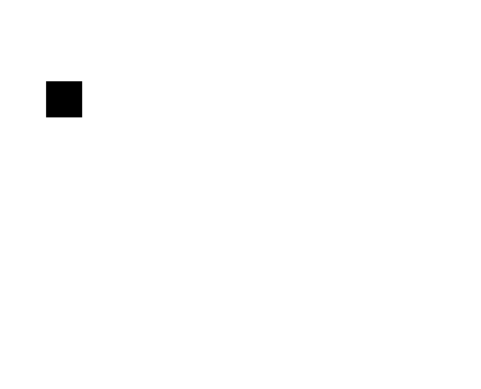

here
100 200


libpng warning: pHYs: CRC error


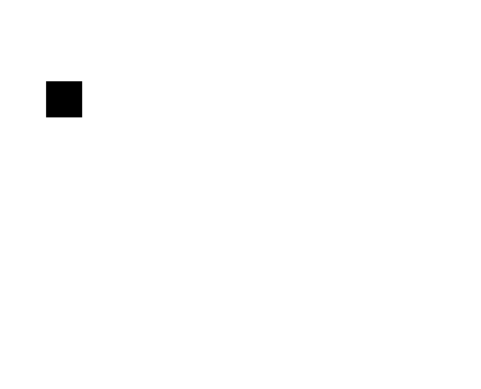

here
100 200


libpng warning: pHYs: CRC error


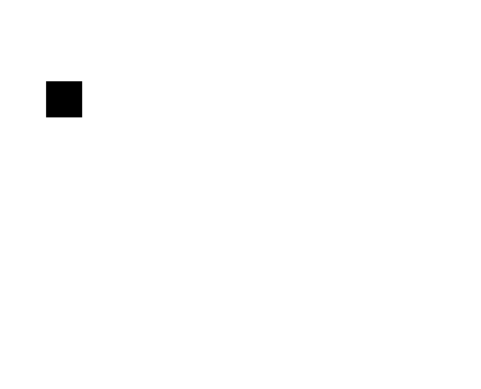

here
100 200


libpng warning: pHYs: CRC error


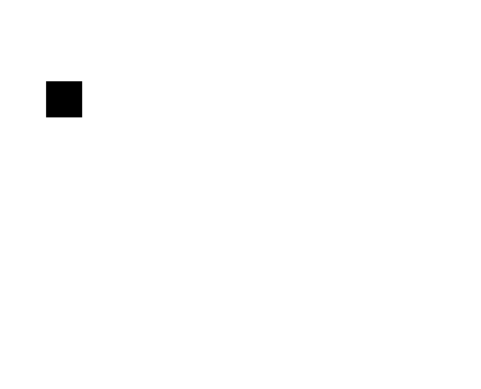

here
100 200


libpng warning: pHYs: CRC error


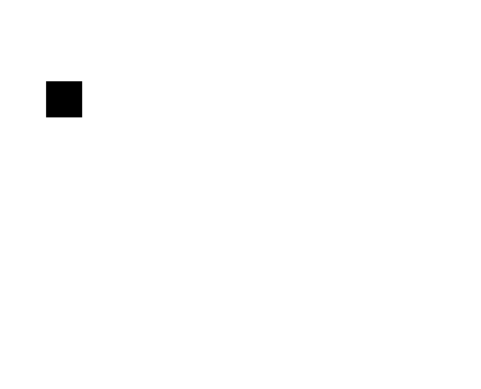

here
100 200


libpng warning: pHYs: CRC error


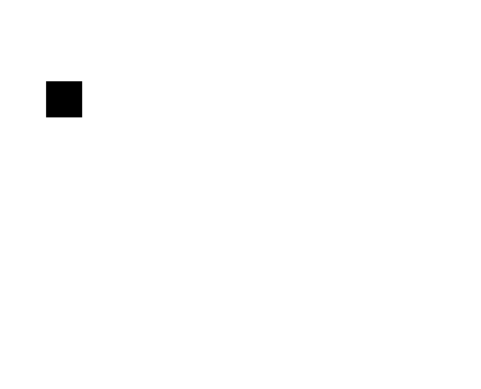

here
100 200


libpng warning: pHYs: CRC error


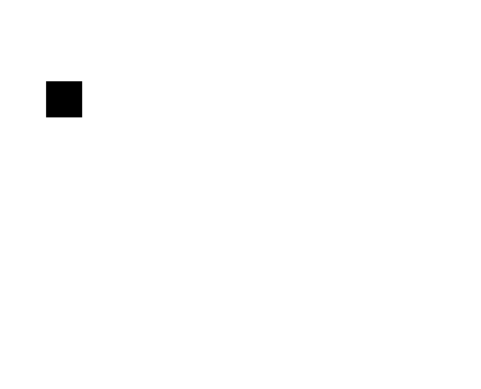

here
100 200


libpng warning: pHYs: CRC error


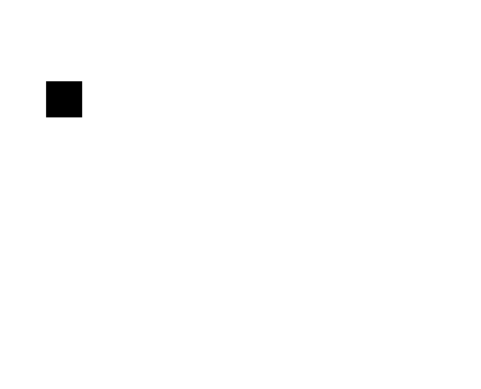

here
100 200


libpng warning: pHYs: CRC error


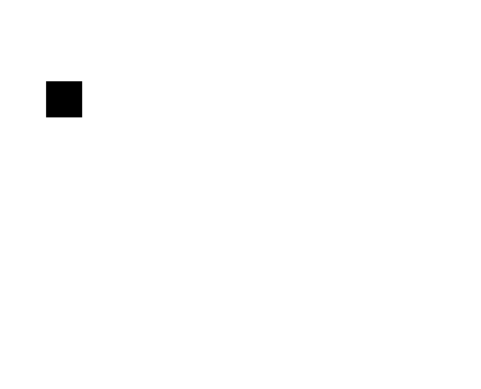

here
100 200


libpng warning: pHYs: CRC error


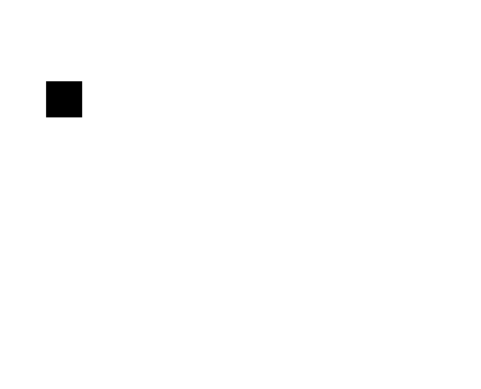

here
100 200


libpng warning: pHYs: CRC error


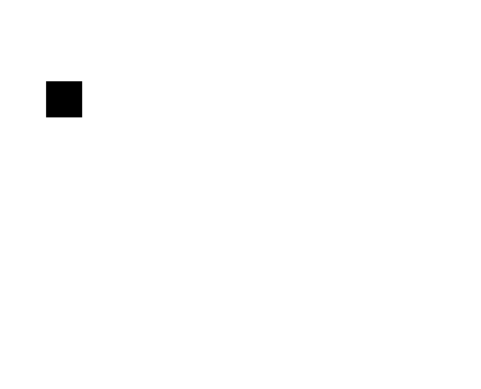

here
100 200


libpng warning: pHYs: CRC error


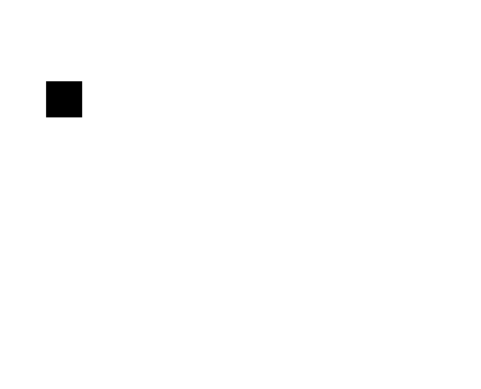

here
100 200


libpng warning: pHYs: CRC error


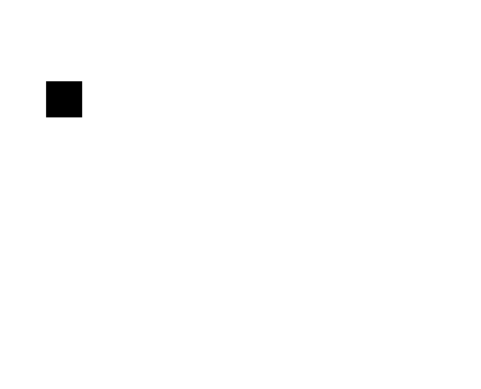

here
100 200


libpng warning: pHYs: CRC error


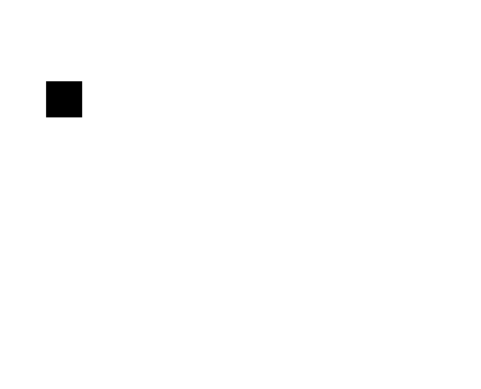

here
100 200


libpng warning: pHYs: CRC error


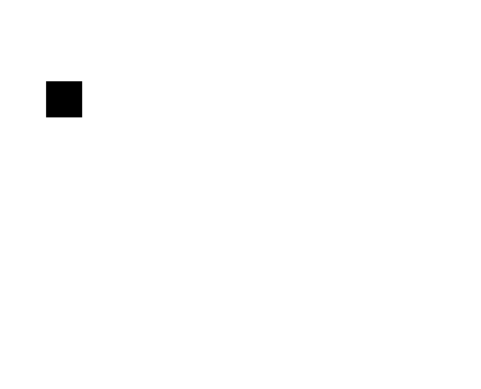

here
100 200


libpng warning: pHYs: CRC error


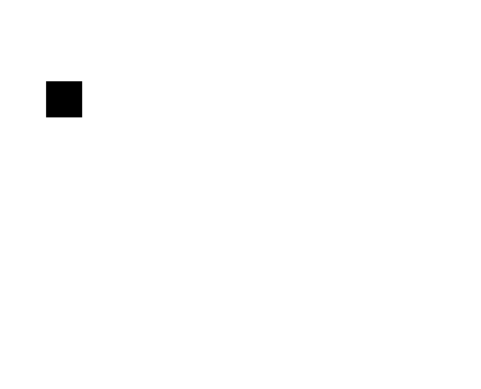

here
100 200


libpng warning: pHYs: CRC error


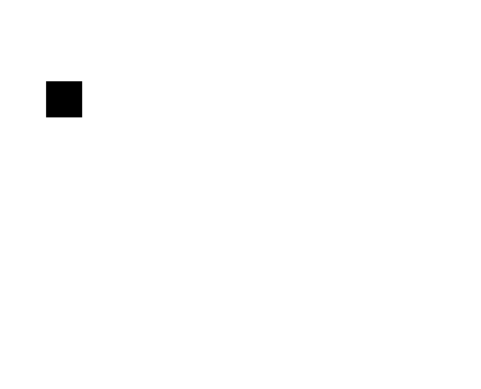

here
100 200


libpng warning: pHYs: CRC error


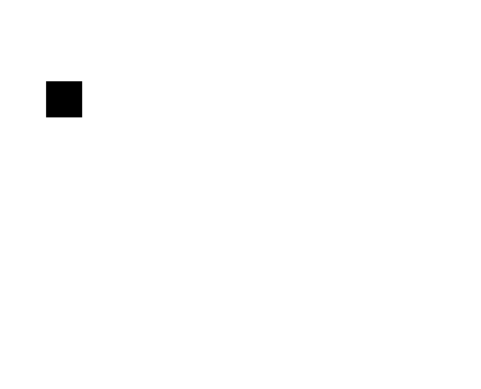

here
100 200


libpng warning: pHYs: CRC error


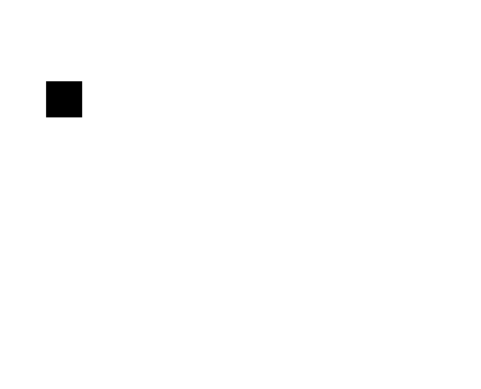

here


libpng warning: pHYs: CRC error


100 200


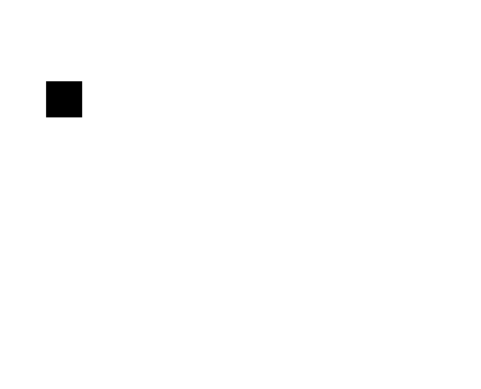

here
100 200


libpng warning: pHYs: CRC error


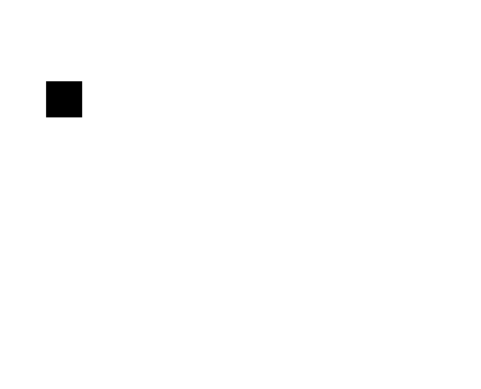

here
100 200


libpng warning: pHYs: CRC error


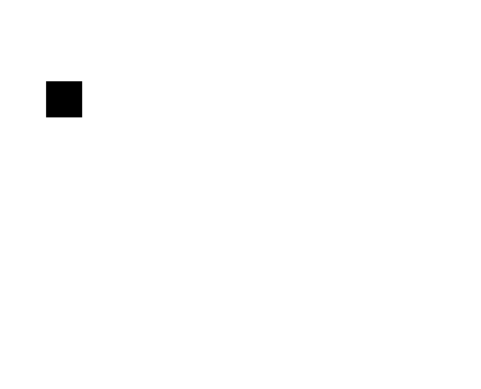

here
100 200


libpng warning: pHYs: CRC error


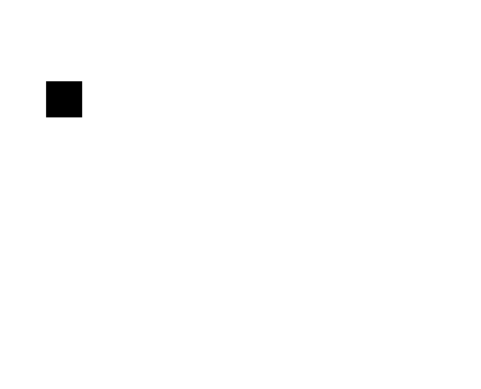

here
100 200


libpng warning: pHYs: CRC error


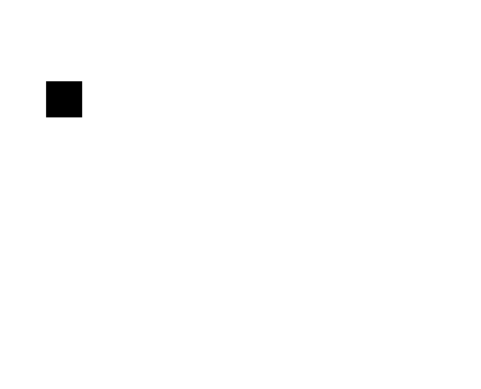

here
100 200


libpng warning: pHYs: CRC error


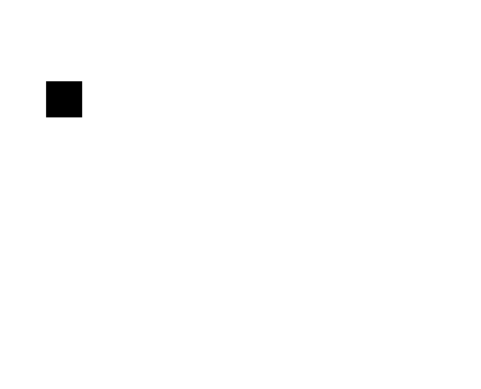

here
100 200


libpng warning: pHYs: CRC error


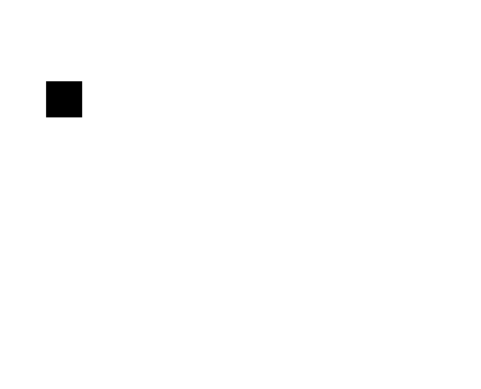

here
100 200


libpng warning: pHYs: CRC error


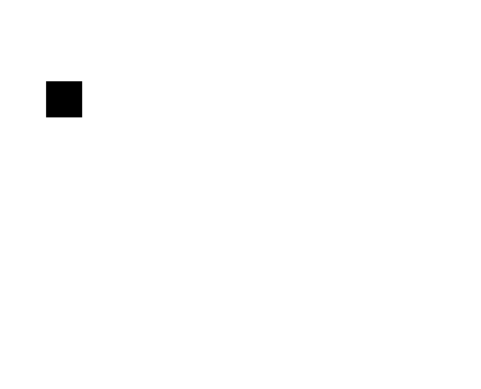

here
100 200


libpng warning: pHYs: CRC error


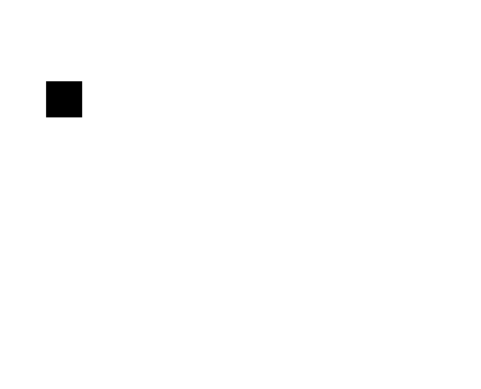

here
100 200


libpng warning: pHYs: CRC error


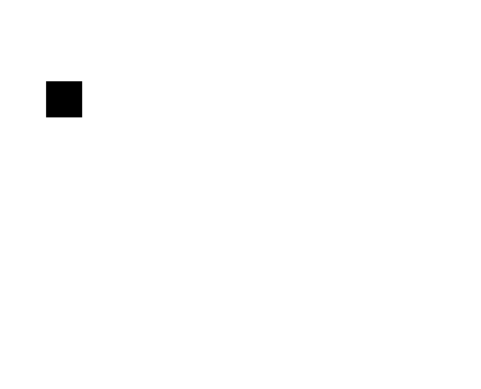

here
100 200


libpng warning: pHYs: CRC error


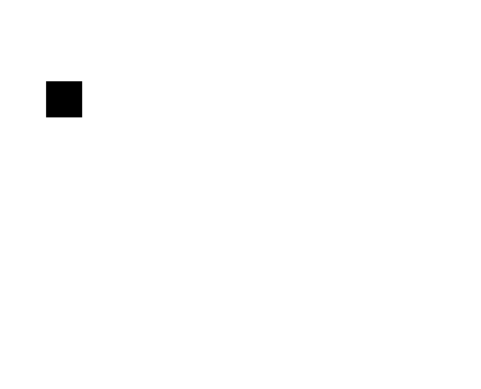

here
100 200


libpng warning: pHYs: CRC error


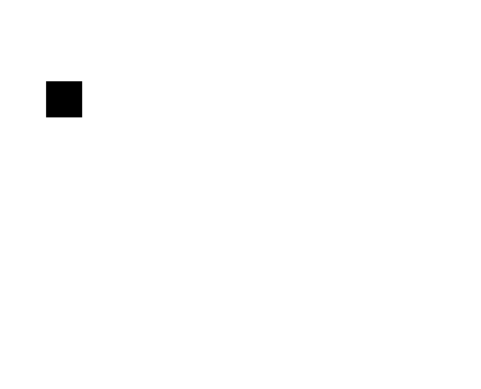

here
100 200


libpng warning: pHYs: CRC error


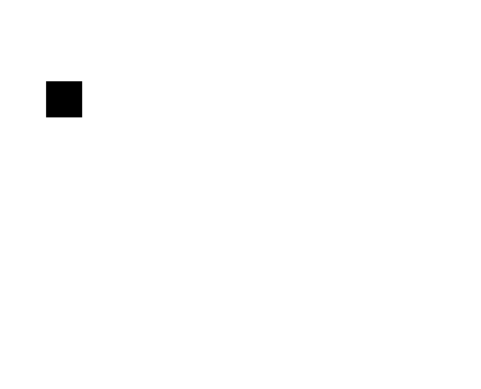

here


libpng warning: pHYs: CRC error


100 200


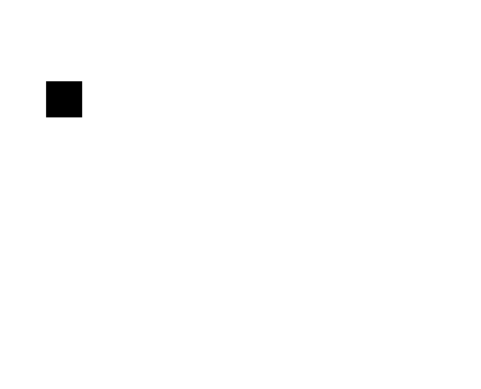

here


libpng warning: pHYs: CRC error


100 200


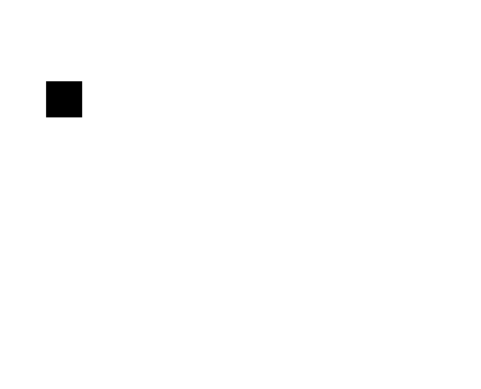

here
100 200


libpng warning: pHYs: CRC error


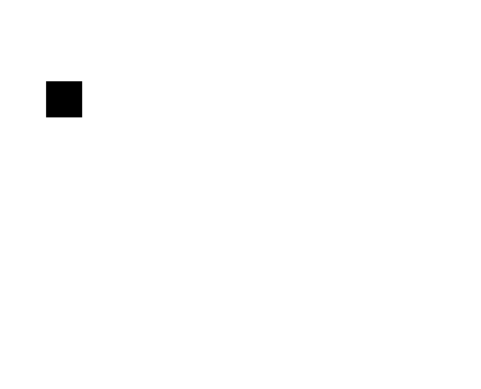

here
100 200


libpng warning: pHYs: CRC error


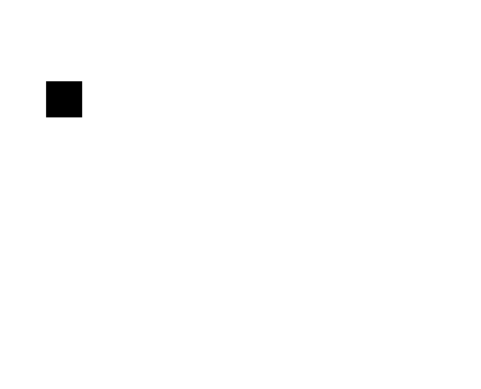

here
100 200


libpng warning: pHYs: CRC error


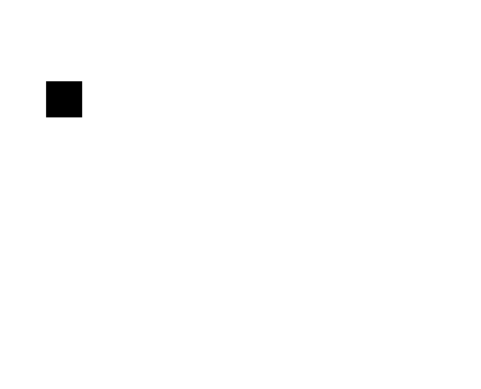

here
100 200


libpng warning: pHYs: CRC error


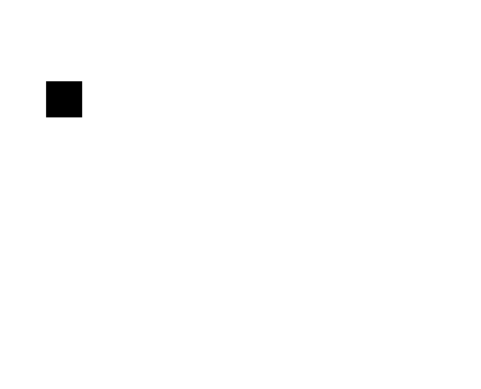

here
100 200


libpng warning: pHYs: CRC error


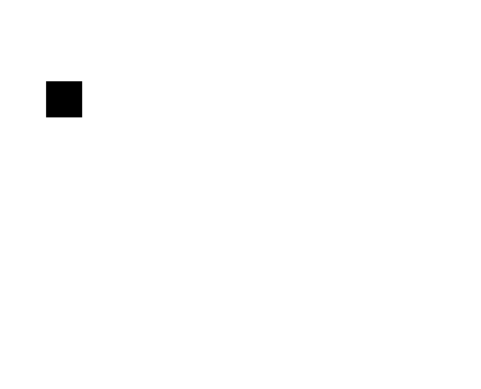

here
100 200


libpng warning: pHYs: CRC error


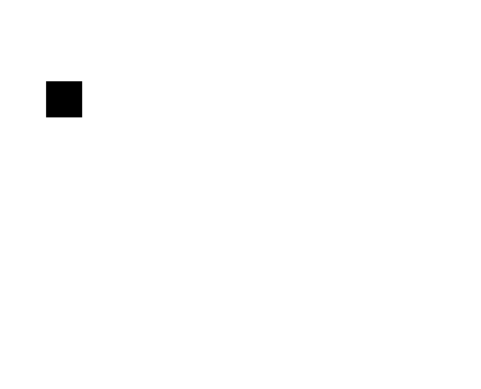

here
100 200


libpng warning: pHYs: CRC error


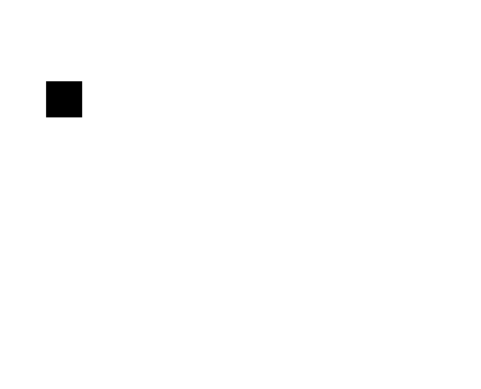

here


libpng warning: pHYs: CRC error


100 200


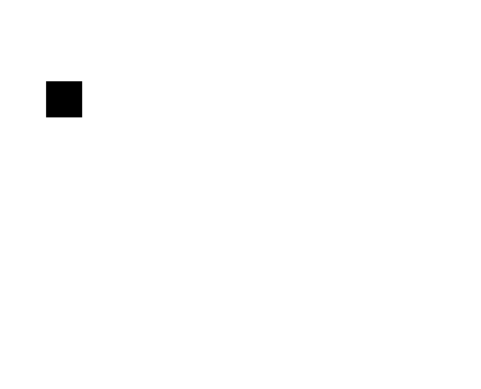

here
100 200


libpng warning: pHYs: CRC error


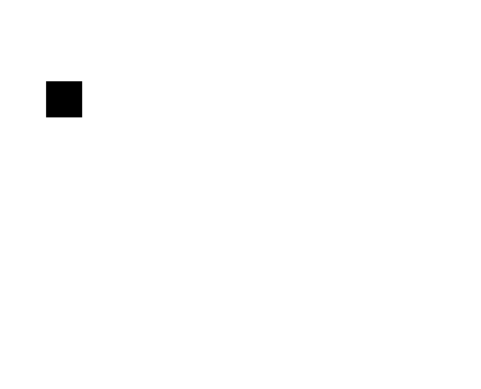

here
100 200


libpng warning: pHYs: CRC error


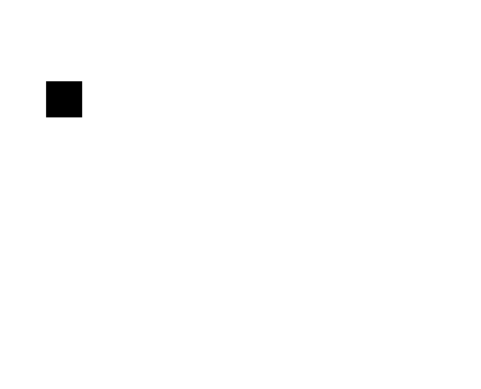

here


libpng warning: pHYs: CRC error


200 200


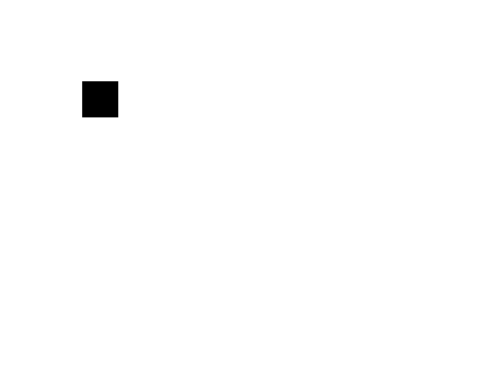

here
200 200


libpng warning: pHYs: CRC error


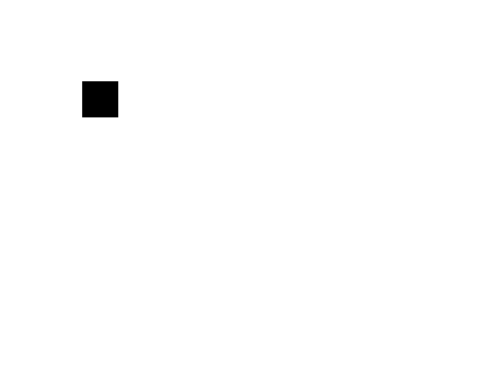

here
200 200


libpng warning: pHYs: CRC error


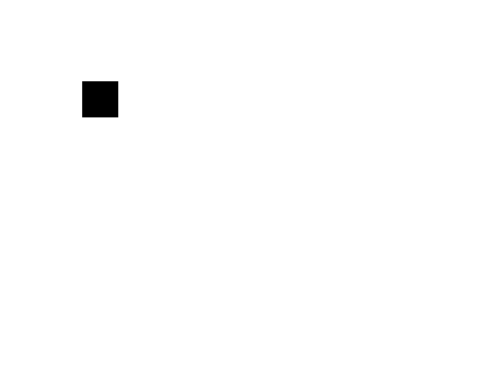

here
200 200


libpng warning: pHYs: CRC error


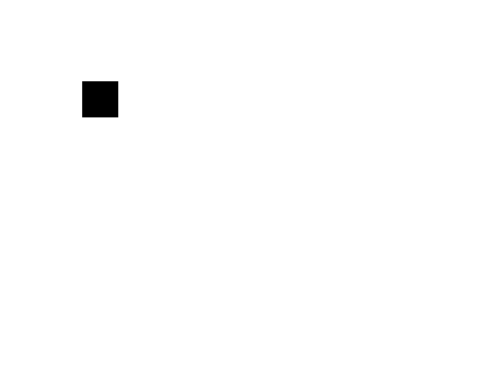

here
200 200


libpng warning: pHYs: CRC error


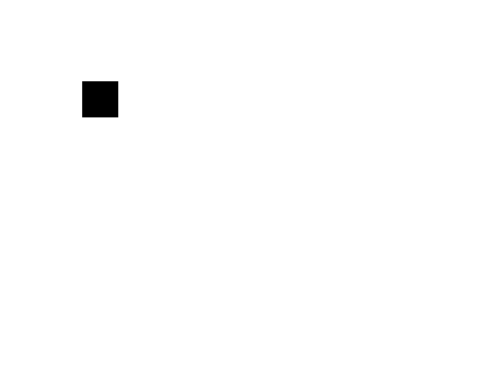

here
200 200


libpng warning: pHYs: CRC error


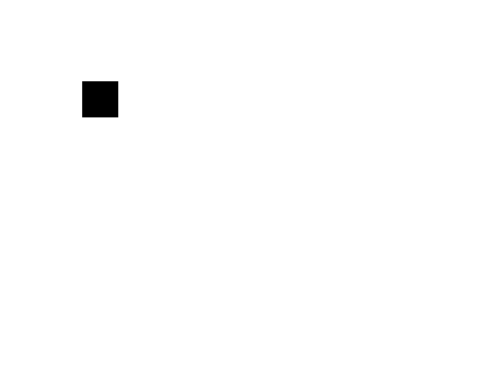

here
200 200


libpng warning: pHYs: CRC error


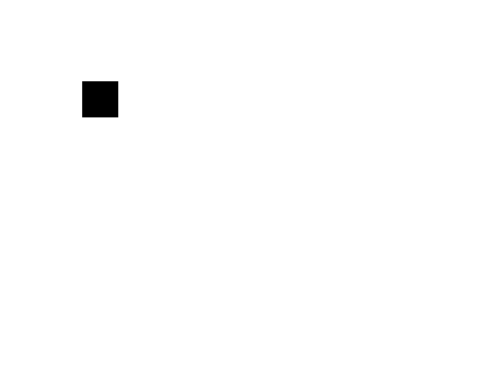

here
200 200


libpng warning: pHYs: CRC error


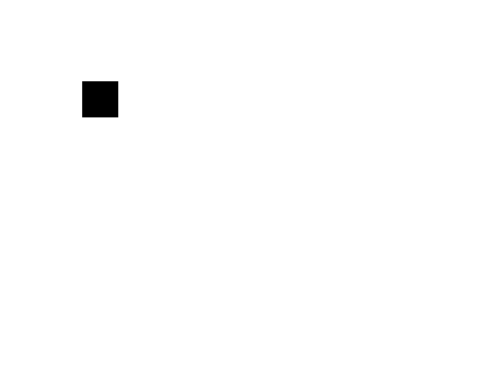

here
200 200


libpng warning: pHYs: CRC error


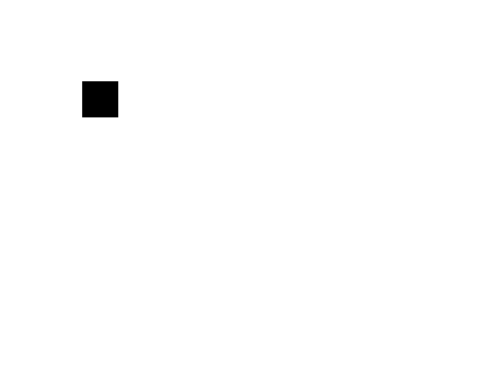

here
200 200


libpng warning: pHYs: CRC error


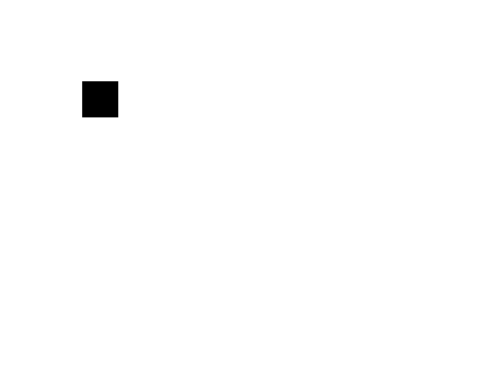

here
200 200


libpng warning: pHYs: CRC error


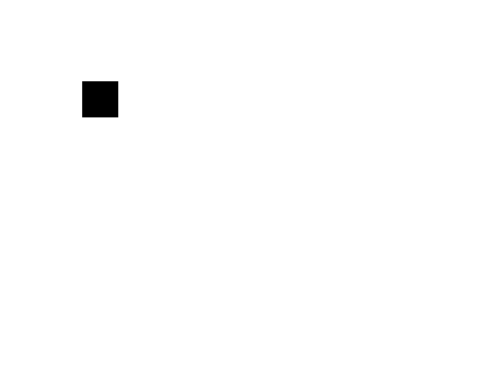

here
200 200


libpng warning: pHYs: CRC error


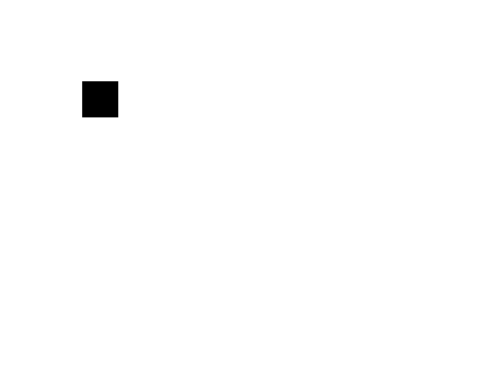

here
200 200


libpng warning: pHYs: CRC error


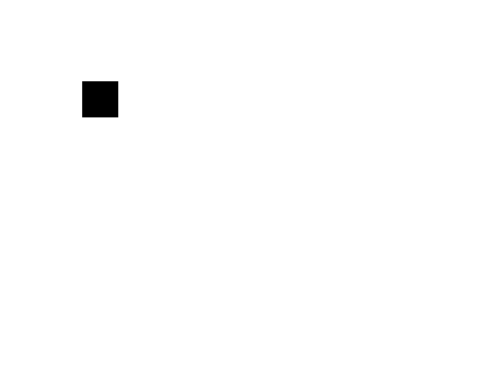

here
200 200


libpng warning: pHYs: CRC error


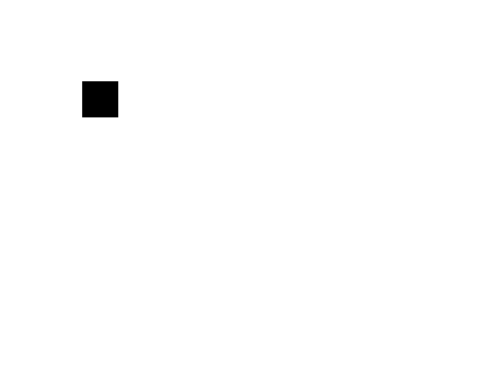

here
200 200


libpng warning: pHYs: CRC error


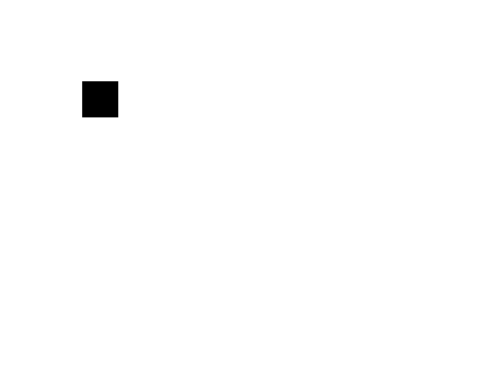

here
200 200


libpng warning: pHYs: CRC error


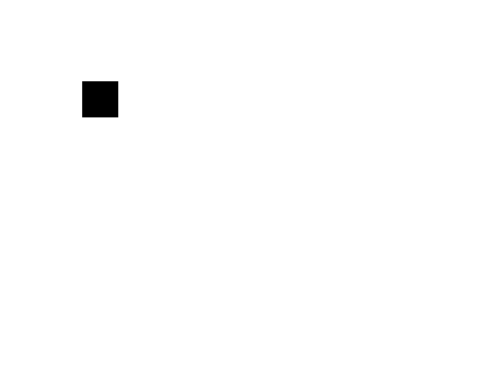

here
200 200


libpng warning: pHYs: CRC error


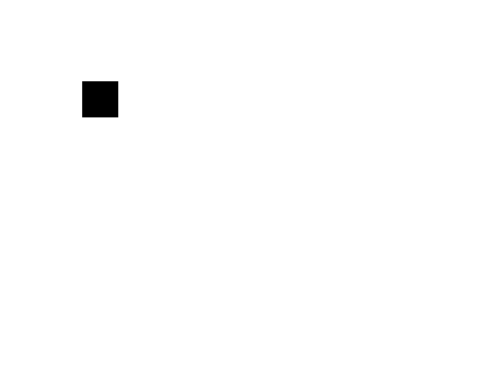

here
200 200


libpng warning: pHYs: CRC error


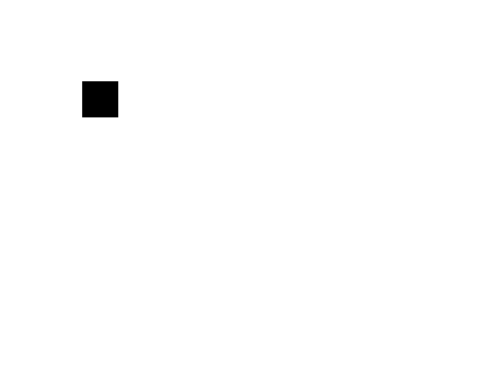

here
200 200


libpng warning: pHYs: CRC error


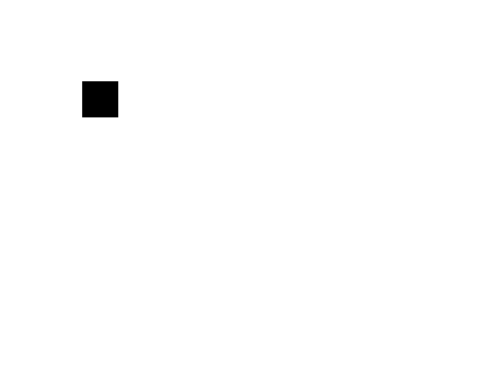

here
200 200


libpng warning: pHYs: CRC error


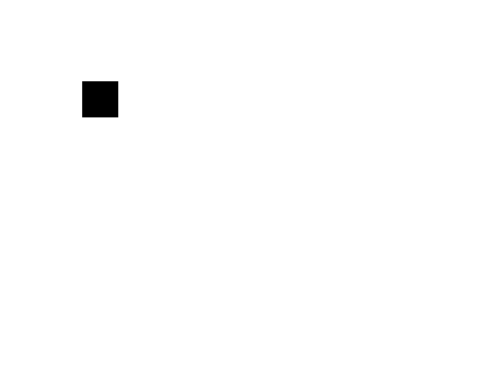

here
200 200


libpng warning: pHYs: CRC error


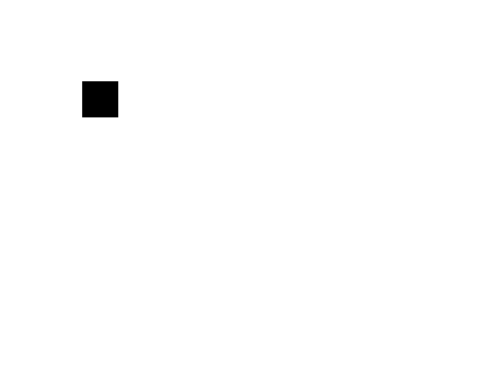

here
200 200


libpng warning: pHYs: CRC error


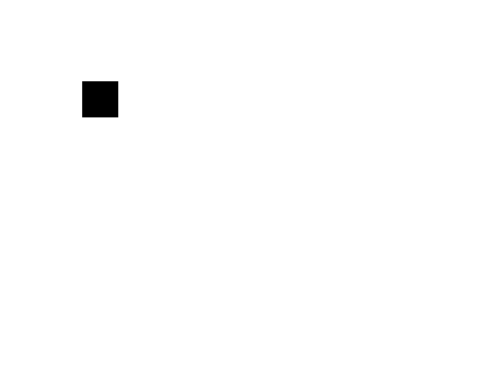

here
200 200


libpng warning: pHYs: CRC error


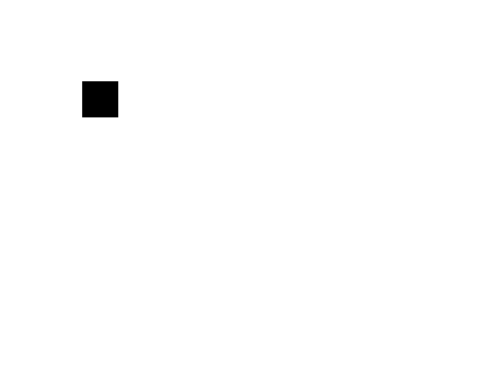

here


libpng warning: pHYs: CRC error


200 200


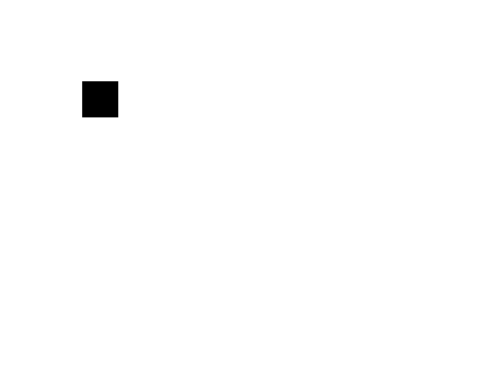

here
200 200


libpng warning: pHYs: CRC error


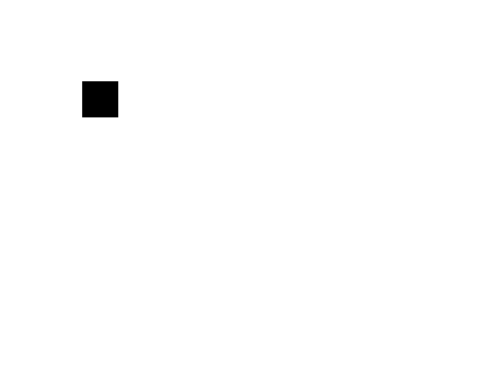

here
200 200


libpng warning: pHYs: CRC error


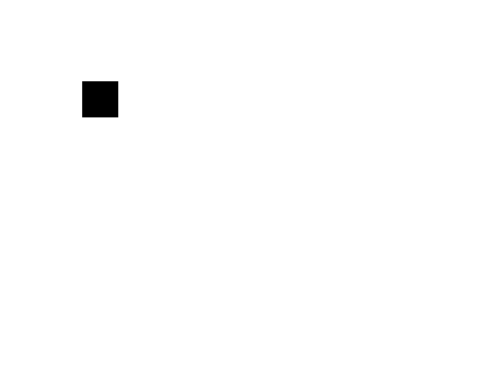

here
200 200


libpng warning: pHYs: CRC error


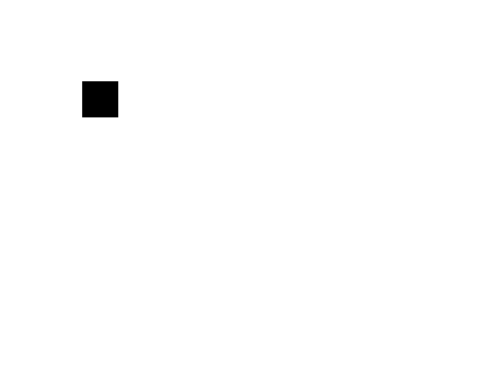

here
200 200


libpng warning: pHYs: CRC error


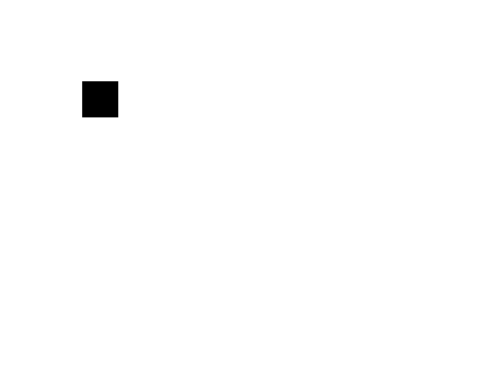

here
200 200


libpng warning: pHYs: CRC error


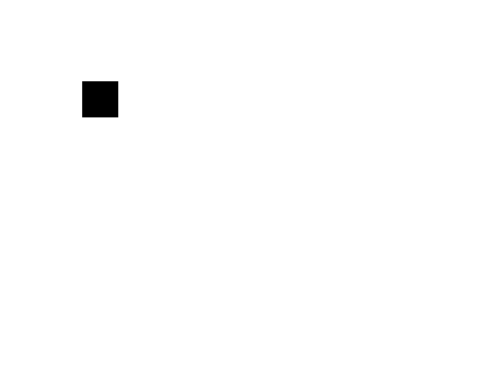

here
200 200


libpng warning: pHYs: CRC error


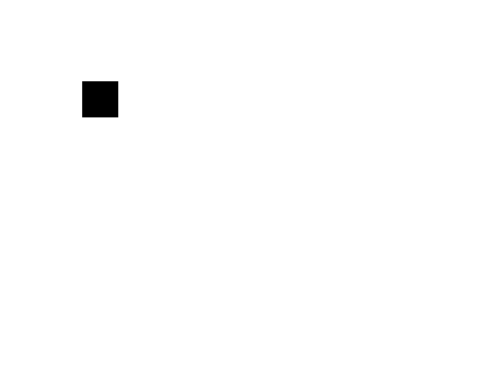

here
200 200


libpng warning: pHYs: CRC error


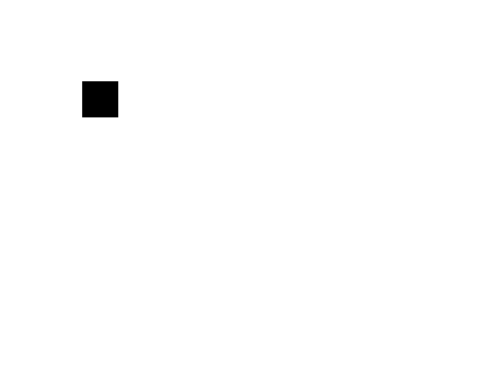

here
200 200


libpng warning: pHYs: CRC error


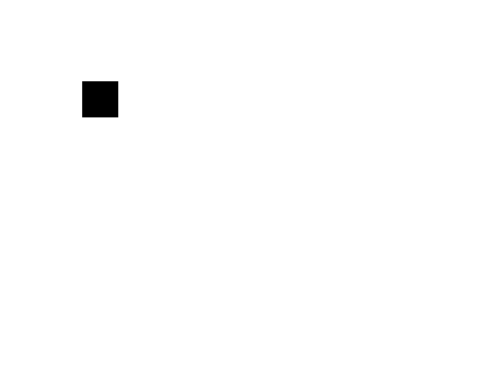

here


libpng warning: pHYs: CRC error


200 200


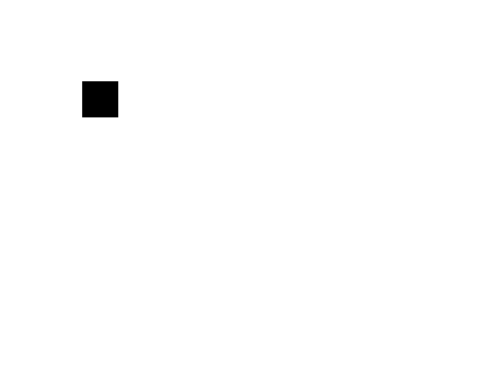

here
200 200


libpng warning: pHYs: CRC error


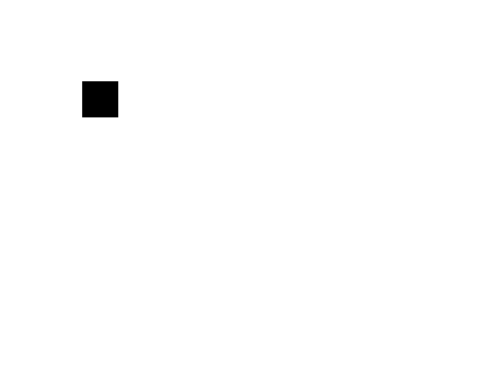

here
200 200


libpng warning: pHYs: CRC error


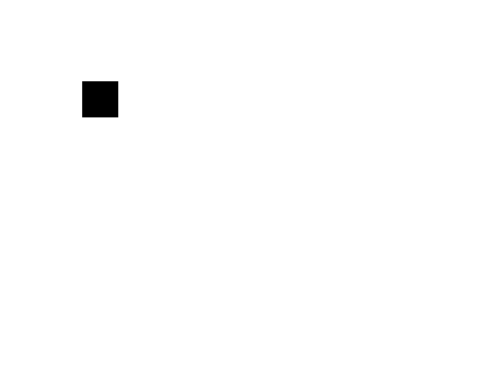

here
200 200


libpng warning: pHYs: CRC error


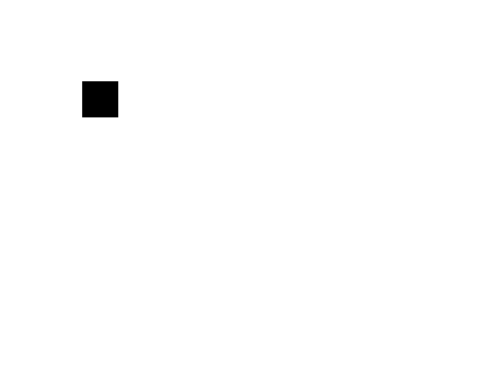

here
200 200


libpng warning: pHYs: CRC error


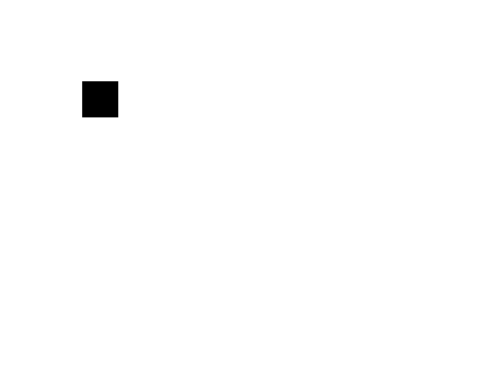

here
200 200


libpng warning: pHYs: CRC error


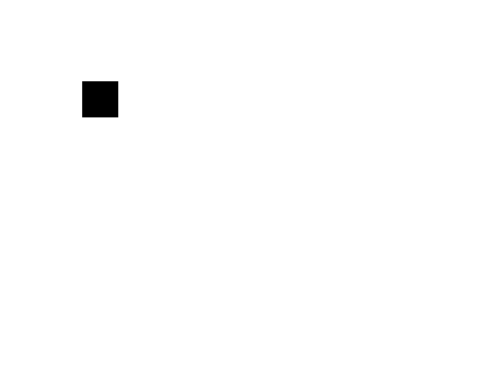

here
200 200


libpng warning: pHYs: CRC error


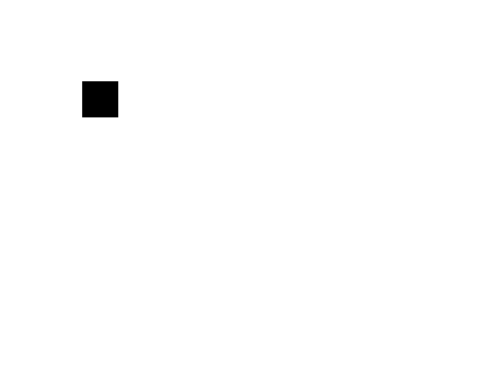

here
200 200


libpng warning: pHYs: CRC error


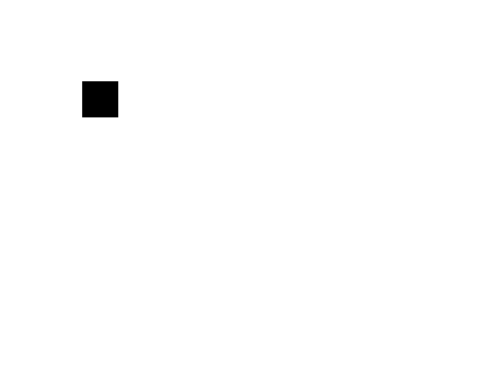

here
200 200


libpng warning: pHYs: CRC error


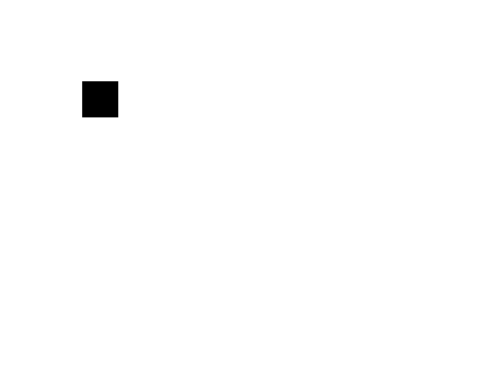

here
200 200


libpng warning: pHYs: CRC error


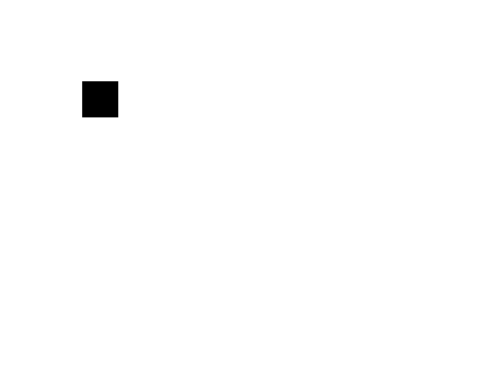

here
200 200


libpng warning: pHYs: CRC error


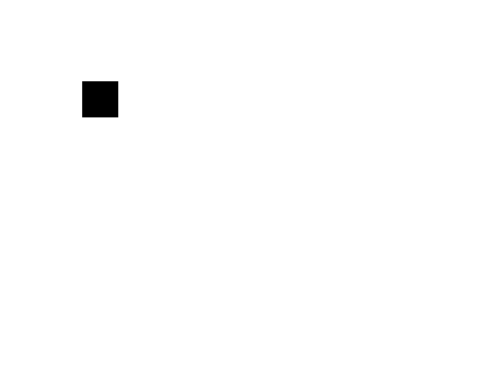

here
200 200


libpng warning: pHYs: CRC error


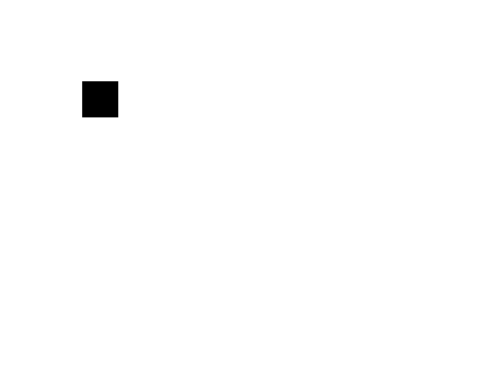

here
200 200


libpng warning: pHYs: CRC error


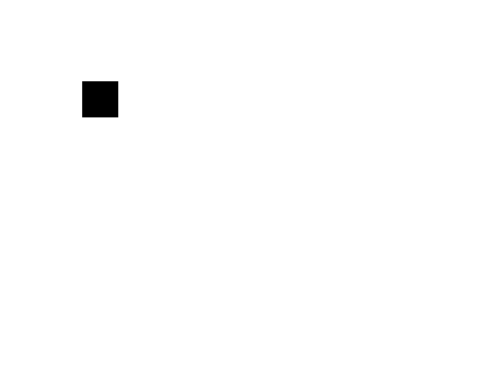

here
200 200


libpng warning: pHYs: CRC error


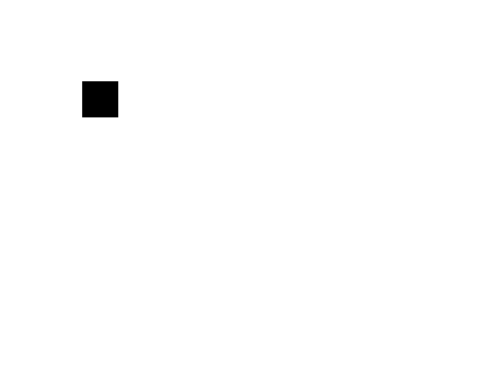

here
200 200


libpng warning: pHYs: CRC error


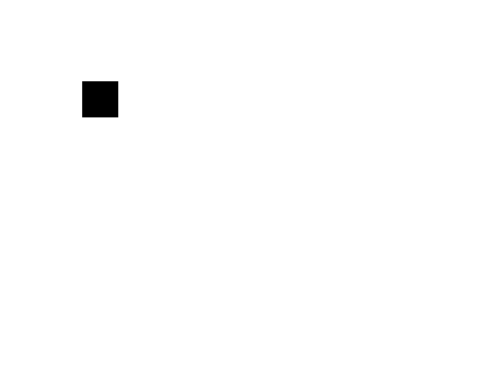

here
200 200


libpng warning: pHYs: CRC error


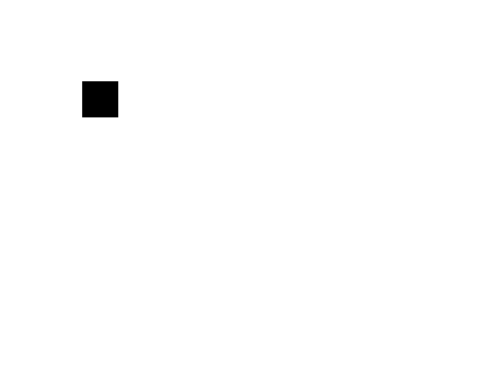

here
200 200


libpng warning: pHYs: CRC error


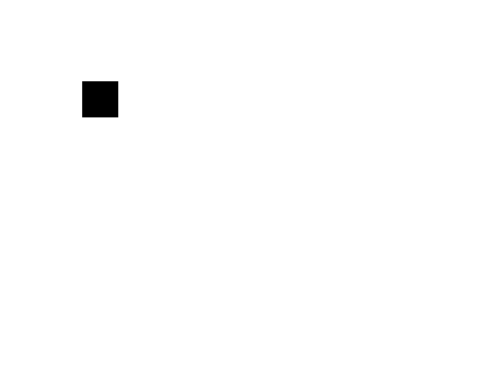

here
200 200


libpng warning: pHYs: CRC error


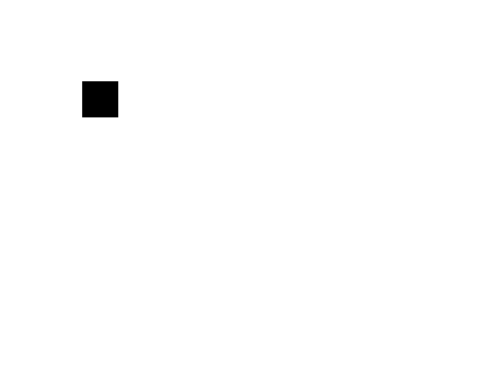

here
200 200


libpng warning: pHYs: CRC error


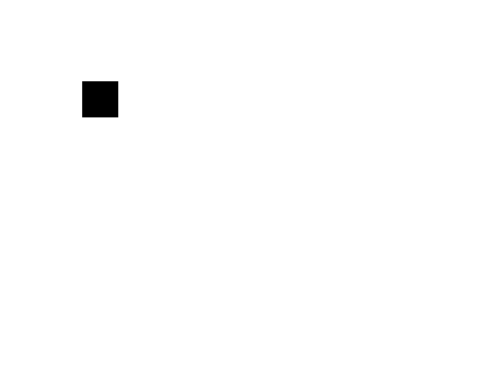

here
200 200


libpng warning: pHYs: CRC error


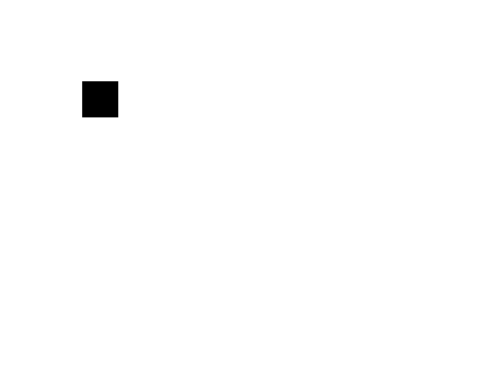

here
300 200


libpng warning: pHYs: CRC error


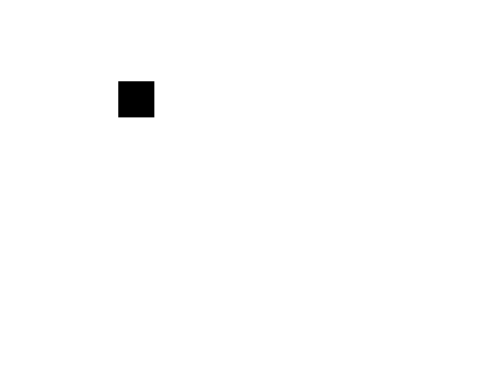

here
300 200


libpng warning: pHYs: CRC error


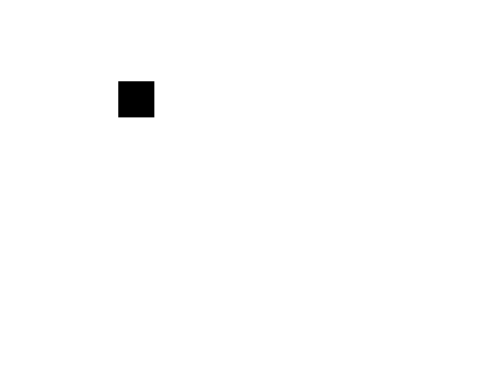

here
300 200


libpng warning: pHYs: CRC error


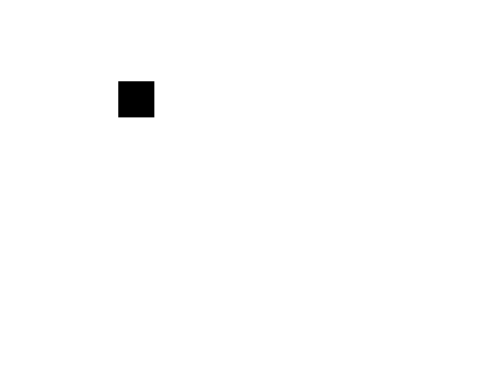

here
300 200


libpng warning: pHYs: CRC error


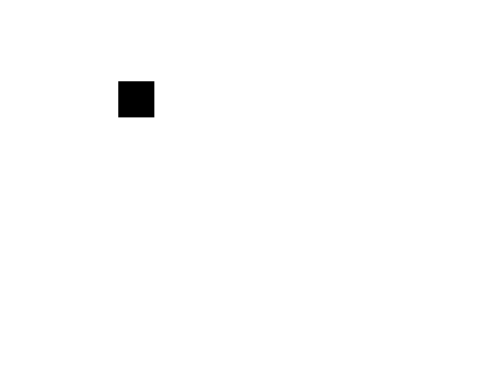

here
300 200


libpng warning: pHYs: CRC error


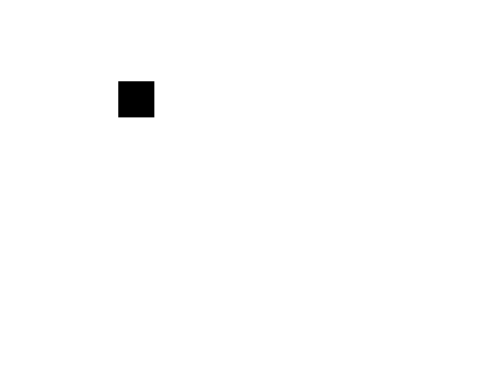

here
300 200


libpng warning: pHYs: CRC error


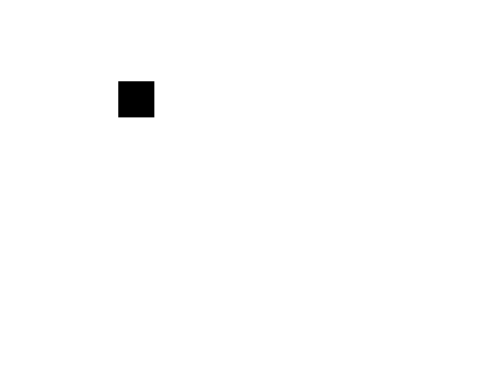

here


libpng warning: pHYs: CRC error


300 200


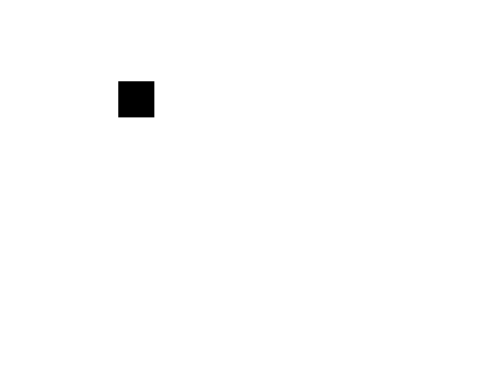

here
300 200


libpng warning: pHYs: CRC error


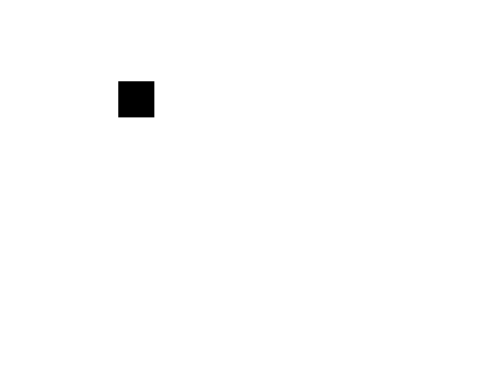

here
300 200


libpng warning: pHYs: CRC error


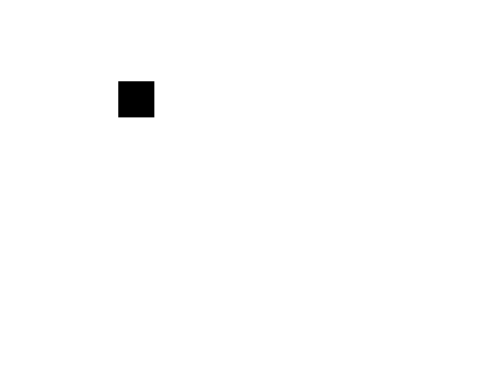

here


libpng warning: pHYs: CRC error


300 200


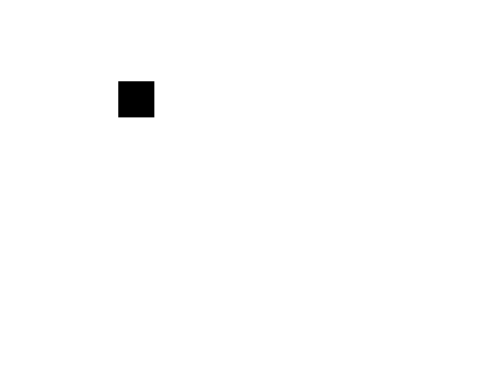

here
300 200


libpng warning: pHYs: CRC error


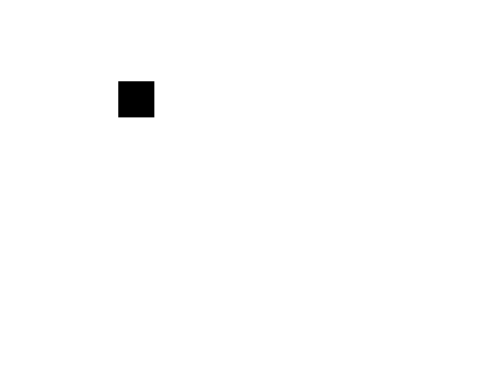

here
300 200


libpng warning: pHYs: CRC error


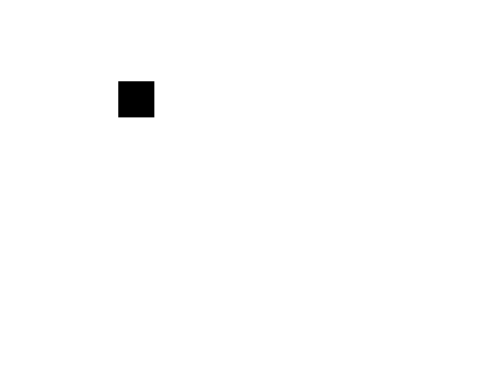

here
300 200


libpng warning: pHYs: CRC error


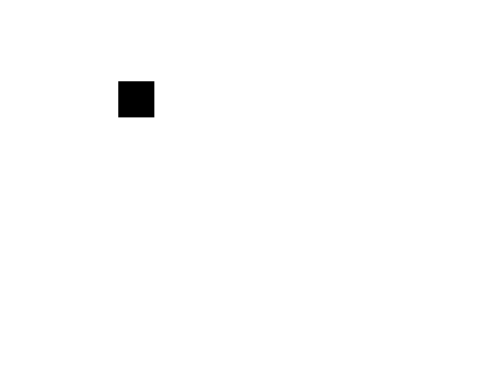

here
300 200


libpng warning: pHYs: CRC error


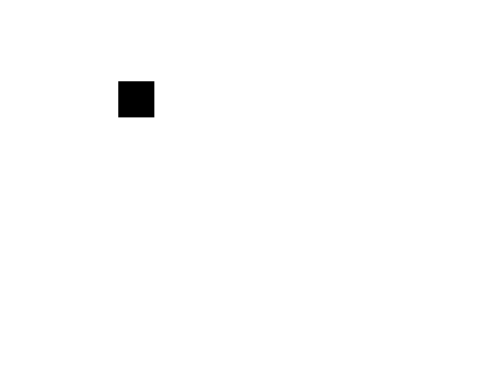

here
300 200


libpng warning: pHYs: CRC error


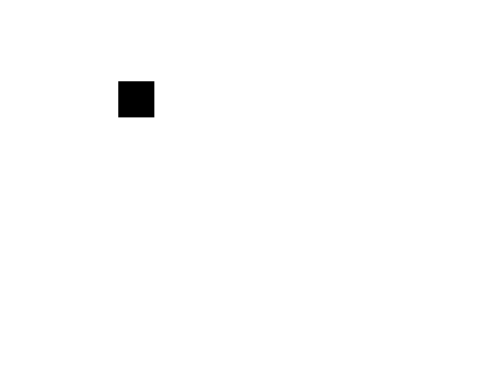

here
300 200


libpng warning: pHYs: CRC error


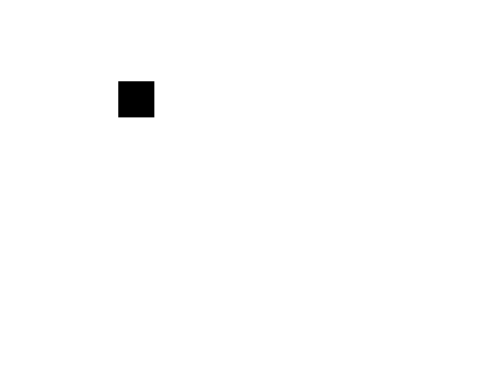

IndexError: list index out of range

In [284]:
import numpy as np
import matplotlib.pyplot as plt

start = 4
folder_size = 150
end = folder_size+4
file_path = '/Users/christianjohnson/Downloads/Glare/GLARE/images'

images = []
# for i in range(folder_size):
#     if i >= 100:
#         name="/Users/christianjohnson/Downloads/Glare/testPylonImages/Basler_acA1300-200um__24681880__20240501_014715405_0"
#     if i >= 10:
#         name="/Users/christianjohnson/Downloads/Glare/testPylonImages/Basler_acA1300-200um__24681880__20240501_014715405_00"
#     else:
#         name="/Users/christianjohnson/Downloads/Glare/testPylonImages/Basler_acA1300-200um__24681880__20240501_014715405_000"
#     name+=str(i)
#     name+=".tiff"
#     images.append(name)

for i in range(1,150):
    name = file_path + "/NOutput" + str(i) + ".png"
    images.append(name) 

print(images)

for i in range(150):
    image = np.zeros((1024, 1280, 4), dtype=np.uint8)  # RGBA format
    png_path = images[i]
    jump = 100
    print('here')
    im = cv2.imread(png_path, cv2.IMREAD_GRAYSCALE)
    imarray = np.array(im)
    y,x = universal_blocking(imarray,jump)
    print(x,y)
    # Define the coordinates for the black square
    top_left_x = x
    top_left_y = y
    bottom_right_x = top_left_x + 100
    bottom_right_y = top_left_y + 100

    # Place a black square on the image
    image[top_left_y:bottom_right_y, top_left_x:bottom_right_x, 0:3] = 0
    image[top_left_y:bottom_right_y, top_left_x:bottom_right_x, 3] = 255  # Alpha channel to make it opaque
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.savefig(f"test{i}.png")
    plt.show()
    #im = Image.fromarray(image)
    #im.save(f"testingim{i}.jpg") 

# # Create a blank image with transparent background
# image = np.zeros((1024, 1280, 4), dtype=np.uint8)  # RGBA format



# tiff_path = '/Users/christianjohnson/Downloads/Glare/GLARE/images/NOutput136.png'
# jump = 100

# im = cv2.imread(images[50], cv2.IMREAD_GRAYSCALE)

# imarray = np.array(im)
# print(imarray)
# show(imarray, cmap='gray')
# y,x = universal_blocking(imarray,jump)
# print(x,y)
# # Define the coordinates for the black square
# top_left_x = x
# top_left_y = y
# bottom_right_x = top_left_x + 100
# bottom_right_y = top_left_y + 100

# # Place a black square on the image
# image[top_left_y:bottom_right_y, top_left_x:bottom_right_x, 0:3] = 0  # RGB values for black
# image[top_left_y:bottom_right_y, top_left_x:bottom_right_x, 3] = 255  # Alpha channel to make it opaque

# # Display the image
# plt.imshow(image)
# plt.axis('off')
# plt.show()

In [291]:
# Conversion of images to video

import cv2
import os

folder_size = 123


def images_to_video2(image_folder, video_name, fps):
    #images = [img for img in os.listdir(image_folder) if img.endswith(".tiff")]

    images = []
    for i in range(148):
        name = image_folder + "/test" + str(i) + ".png"
        print(name)
        images.append(name)
        
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layer = frame.shape
    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    cv2.destroyAllWindows()
    video.release()

# Provide the path to the folder containing images, desired output video name, and frame rate
image_folder = '/Users/christianjohnson/Downloads/Glare/GLARE/blockedFolder'
video_name = 'demo3GLARE.mp4'
fps = 1  # Adjust the frame rate as per your requirement

images_to_video2(image_folder, video_name, 10)

/Users/christianjohnson/Downloads/Glare/GLARE/blockedFolder/test0.png
/Users/christianjohnson/Downloads/Glare/GLARE/blockedFolder/test1.png
/Users/christianjohnson/Downloads/Glare/GLARE/blockedFolder/test2.png
/Users/christianjohnson/Downloads/Glare/GLARE/blockedFolder/test3.png
/Users/christianjohnson/Downloads/Glare/GLARE/blockedFolder/test4.png
/Users/christianjohnson/Downloads/Glare/GLARE/blockedFolder/test5.png
/Users/christianjohnson/Downloads/Glare/GLARE/blockedFolder/test6.png
/Users/christianjohnson/Downloads/Glare/GLARE/blockedFolder/test7.png
/Users/christianjohnson/Downloads/Glare/GLARE/blockedFolder/test8.png
/Users/christianjohnson/Downloads/Glare/GLARE/blockedFolder/test9.png
/Users/christianjohnson/Downloads/Glare/GLARE/blockedFolder/test10.png
/Users/christianjohnson/Downloads/Glare/GLARE/blockedFolder/test11.png
/Users/christianjohnson/Downloads/Glare/GLARE/blockedFolder/test12.png
/Users/christianjohnson/Downloads/Glare/GLARE/blockedFolder/test13.png
/Users/christian

In [238]:
import aspose.words as aw


start = 100
end = 150+4
#end=19
images = []
for i in range(start, end):
    if i >= 100:
        name="/Users/christianjohnson/Downloads/Glare/basler_data/Basler_acA1300-200um__24681880__20240501_014715405_0"
    elif i > 10:
        name="/Users/christianjohnson/Downloads/Glare/basler_data/Basler_acA1300-200um__24681880__20240501_014715405_00"

    else:
        name="/Users/christianjohnson/Downloads/Glare/basler_data/Basler_acA1300-200um__24681880__20240501_014715405_000"

    name+=str(i)
    name+=".tiff"
    images.append(name)
#for i in range(folder_size):
    
doc = aw.Document()
builder = aw.DocumentBuilder(doc)
#fileNames = images
counter =1+96
for img in images:
    print(img)
    outname="NOutput"
    outname+=str(counter)
    outname+=".png"
    
    
    #fileNames=img
    #shapes = [builder.insert_image(fileName) for fileName in fileNames]
    shape = builder.insert_image(img)
    shape.get_shape_renderer().save(outname, aw.saving.ImageSaveOptions(aw.SaveFormat.PNG))
    # Calculate the maximum width and height and update page settings 
    # to crop the document to fit the size of the pictures.
    # pageSetup = builder.page_setup
    # pageSetup.page_width = max(shape.width for shape in shapes)
    # pageSetup.page_height = sum(shape.height for shape in shapes)
    # pageSetup.top_margin = 0
    # pageSetup.left_margin = 0
    # pageSetup.bottom_margin = 0
    # pageSetup.right_margin = 0

    #doc.save(outname)
    counter+=1
    #/Users/christianjohnson/Downloads/Glare/basler_data/Basler_acA1300-200um__24681880__20240501_014715405_0004.tiff

/Users/christianjohnson/Downloads/Glare/basler_data/Basler_acA1300-200um__24681880__20240501_014715405_0100.tiff
/Users/christianjohnson/Downloads/Glare/basler_data/Basler_acA1300-200um__24681880__20240501_014715405_0101.tiff
/Users/christianjohnson/Downloads/Glare/basler_data/Basler_acA1300-200um__24681880__20240501_014715405_0102.tiff
/Users/christianjohnson/Downloads/Glare/basler_data/Basler_acA1300-200um__24681880__20240501_014715405_0103.tiff
/Users/christianjohnson/Downloads/Glare/basler_data/Basler_acA1300-200um__24681880__20240501_014715405_0104.tiff
/Users/christianjohnson/Downloads/Glare/basler_data/Basler_acA1300-200um__24681880__20240501_014715405_0105.tiff
/Users/christianjohnson/Downloads/Glare/basler_data/Basler_acA1300-200um__24681880__20240501_014715405_0106.tiff
/Users/christianjohnson/Downloads/Glare/basler_data/Basler_acA1300-200um__24681880__20240501_014715405_0107.tiff
/Users/christianjohnson/Downloads/Glare/basler_data/Basler_acA1300-200um__24681880__20240501_014